# Project Phase 2: Regression

CMPT 3150 - Machine Learning 1

Team Members:
- Angela Lekivetz
- Alma Soria
- Crystal Blackburn
- Michaela Goud

# 1.Introduction

This project analyzes the **National Pollutant Release Inventory (NPRI)** dataset. Building on the classification work from Phase 1, the focus now shifts to **regression modeling** to forecast pollutant release trends across industries. The primary objective is to **identify industries with the highest projected increases and decreases** in pollutant emissions over the next five years.

### Project Goals:

1. **Refine the Time Series Dataset**  
   Incorporating feedback from Phase 1, the dataset will be cleaned and restructured to support robust forecasting. This includes applying time-series transformations, handling missing values, and ensuring compatibility with regression models.

2. **Develop Regression Models**  
   Multiple regression techniques will be implemented to predict future pollutant release levels. These models aim to reveal environmental trends at the industry level.

3. **Apply Advanced Feature Engineering**  
   New features—such as lag variables, trend indicators, and encoded categorical data—will be created to enhance model accuracy and interpretability.

4. **Evaluate and Interpret Models**  
   Models will be assessed using standard metrics (RMSE, R², MAE). Outputs will be interpreted to provide actionable insights into industry-specific emission trends.

5. **Document the Process**  
   All work will be presented in a well-structured Jupyter Notebook. Explanations will be supported by selective visualizations, highlighting key steps in the data transformation and modeling pipeline.

---

This phase emphasizes **data preparation**, **thoughtful feature engineering**, and **clear communication** of findings. By leveraging time series regression models, the project aims to deliver accurate predictions and support data-driven environmental decision-making.

> The [NPRI is a Canadian government resource](https://www.canada.ca/en/services/environment/pollution-waste-management/national-pollutant-release-inventory.html) that tracks pollutant releases from industrial and commercial sources, fostering transparency and environmental accountability.



# 2.Project Context / Problem

## Chosen Problem

**Problem #5:**  
*Based on NPRI data, which industry is predicted to have the highest growth in pollutant releases over the next 5 years? Which is expected to have the largest decline?*

## Justification

This problem was selected because it is:

- ✅ **Environmentally Relevant**: Addresses a real-world issue with direct implications for sustainability and policy-making.  
- ✅ **Well-Defined**: Clearly outlines measurable objectives—identifying industries with the highest increase and decrease in emissions.  
- ✅ **Predictive in Nature**: Utilizes historical data for forecasting, aligning well with core machine learning applications.  
- ✅ **Suitable for Supervised Learning**: Leverages time-series regression models to derive industry-specific forecasts.


**Time Series Analysis of Environmental Release Data**

This notebook presents a comprehensive approach to analyzing environmental release data over time. It focuses on pollution releases to **air**, **land**, and **water** from facilities across various industries, with the goal of uncovering **patterns**, **trends**, and **forecasting opportunities**.

**Problem Objective**

Given a dataset where:

- Each row represents reported environmental releases for specific **facilities**, **substances**, and **years**
- Releases are categorized by **medium/target** (air, land, water) and **type** (fugitive, point source, spills, etc.)
- Data spans **multiple years** and includes **various industries and substances**

We aim to:

1. **Aggregate and preprocess** the data for time series analysis  
2. **Separate by substance** to create more focused, interpretable datasets  
3. **Analyze temporal patterns** in releases across different environmental media  (target)
4. **Identify trends** and apply appropriate **time series modeling techniques**


# 3.Data Preparation

Proper data preparation is essential to ensure the dataset is suitable for regression modeling. This section outlines the steps taken to refine the time series data, including:

- **Handling missing values**  
- **Applying time-series transformations**  
- **Ensuring chronological structure**

These steps are critical to maintain data integrity and consistency, allowing the regression models to be trained on **high-quality, reliable inputs**. Well-prepared data forms the foundation for accurate forecasting and meaningful insights.


## Previous Data Cleaning & EDA

The data cleaning and exploratory data analysis (EDA) for the [`NPRI_2000–2022`](https://docs.google.com/spreadsheets/d/1M2qZLLN5NWXvpLgnvNa8iqkakK-IAWVW/edit?usp=sharing&rtpof=true&sd=true) dataset was completed as part of the **CMPT2400** assignment.

For efficiency in this project, we are using the cleaned CSV file:  
📂 [`df_merged_releases.csv`](https://drive.google.com/file/d/10ufcTVPHdto-9PrQfZ-ZdNqNhDm5bf58/view?usp=sharing)

The full notebook from the earlier analysis can be accessed here:  
📘 [`CMPT2400 EDA Notebook`](https://colab.research.google.com/drive/155kdSoL7vpKi5y8peAAm5mPJ5FQWsdJl?usp=sharing)


## Data Loading and Inspection

**Importing Necessary Libraries**

This section includes the essential libraries for data manipulation, visualization, and modeling.

**Justification**:  
The configuration settings applied here improve the readability of DataFrame outputs during exploratory data analysis. Specifically, they ensure:

- All columns are fully visible (no truncation)
- Outputs are more informative when working with wide or complex datasets
- The notebook remains user-friendly and easier to debug

This is particularly important when working with datasets that contain numerous features across time and industry dimensions.



In [ ]:
# Required Libraries
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

import os

In [ ]:
# Set display options to show all columns (no truncation)
pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows

# Increase the maximum width for columns
pd.set_option('display.max_colwidth', None)

The dataset contains environmental release data reported through regulatory programs, likely the National Pollutant Release Inventory (NPRI) based on the column names.

First, we'll examine the overall structure and statistics of our data to understand what we're working with.

In [ ]:
df_releases_preclean = pd.read_csv("df_merged_releases.csv")

In [ ]:
df_releases_preclean.describe()

,Unnamed: 0,Reporting_Year,NPRI_ID,NAICS,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
count,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000,790429.000000
mean,345863.628500,2012.986051,11659.947279,287980.482530,0.641618,0.199026,0.598981,0.001077,14.885013,0.314844,0.000023,0.058349,0.000096,0.267948,0.000013,0.001012,0.086383
std,222743.769049,6.739023,9677.491803,94809.822881,2.776103,1.899313,5.046496,0.023535,27.953791,1.761040,0.002897,1.356997,0.002739,1.924285,0.001657,0.034028,0.204153
min,0.000000,2000.000000,1.000000,111120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144694.000000,2007.000000,3828.000000,211113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,342301.000000,2013.000000,7376.000000,311611.000000,0.000000,0.000000,0.000000,0.000000,0.317700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539908.000000,2019.000000,18670.000000,326210.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018400
max,737515.000000,2023.000000,306556.000000,913910.000000,15.896937,22.506500,58.085000,0.626375,89.996000,16.220312,0.451750,64.015811,0.094850,16.411527,0.249701,1.980165,0.983650


In [ ]:
df_releases_preclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790429 entries, 0 to 790428
Data columns (total 26 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         790429 non-null  int64  
 1   Reporting_Year                                     790429 non-null  int64  
 2   NPRI_ID                                            790429 non-null  int64  
 3   Company_Name                                       790429 non-null  object 
 4   Facility_Name                                      790429 non-null  object 
 5   NAICS                                              790429 non-null  int64  
 6   NAICS_Title                                        790429 non-null  object 
 7   Province                                           790429 non-null  object 
 8   CAS_Number                                         790429 non-null  object

# 4.Data Preprocessing and Feature Engineering

### Aggregating Releases by Media Type

The dataset includes multiple columns representing different types of pollutant releases to **air**, **land**, and **water**. To streamline our analysis and focus on the primary environmental media, we aggregate these into three main categories:

1. **Air Releases**  
   Includes fugitive emissions, stack/point sources, road dust, and other air-related discharges.

2. **Land Releases**  
   Includes leaks, spills, and other land-based pollutant discharges.

3. **Water Releases**  
   Includes direct discharges, leaks, spills, and any other water body releases.

### Why This Matters:

- 🔽 **Reduces dimensionality** for cleaner and more interpretable analysis  
- 📊 **Creates robust time series** without fragmentation across sub-categories  
- 🌎 **Improves visualization and modeling** of the overall environmental impact by medium

The resulting aggregated columns will serve as the **core variables** in our time series analysis and forecasting models.


In [ ]:
target_columns = [
    'Releases to Air - Fugitive',
    'Releases to Air - Other Non-Point',
    'Releases to Air - Road dust',
    'Releases to Air - Spills',
    'Releases to Air - Stack / Point',
    'Releases to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills'
]

#### Media-Based Aggregation Strategy

Aggregating releases by environmental medium (**air**, **land**, and **water**) is scientifically and analytically justified for the following reasons:

1. **Regulatory Focus**  
   Environmental regulations commonly define and enforce limits based on total releases to each medium.

2. **Fate and Transport**  
   Pollutants within the same medium tend to follow similar environmental pathways (e.g., atmospheric dispersion, groundwater infiltration).

3. **Exposure Pathways**  
   Human and ecological exposures are primarily categorized by the medium through which contact occurs (inhalation, ingestion, dermal, etc.).

4. **Analytical Clarity**  
   Aggregating by medium reduces dataset complexity while preserving key environmental distinctions, allowing for more meaningful insights.

> This transformation shifts the dataset from **pathway-specific** metrics to **medium-based** metrics, making it more suitable for time series analysis of long-term environmental impact trends.


In [ ]:
# Group the target columns by media type
air_columns = [col for col in target_columns if 'Air' in col]
land_columns = [col for col in target_columns if 'Land' in col]
water_columns = [col for col in target_columns if 'Water' in col]

# Create a copy of the original dataframe
df_releases = df_releases_preclean.copy()

# Create the aggregated columns
df_releases['Total_Air_Releases'] = df_releases[air_columns].sum(axis=1)
df_releases['Total_Land_Releases'] = df_releases[land_columns].sum(axis=1)
df_releases['Total_Water_Releases'] = df_releases[water_columns].sum(axis=1)

# Drop the individual release columns
df_releases = df_releases.drop(columns=target_columns)

# Now we have a df_releases with aggregated columns instead of individual release columns
print(f"Original DataFrame shape: {df_releases_preclean.shape}")
print(f"New DataFrame shape: {df_releases.shape}")
print("\nNew aggregated columns:")
print(df_releases[['Total_Air_Releases', 'Total_Land_Releases', 'Total_Water_Releases']].describe())

Original DataFrame shape: (790429, 26)
New DataFrame shape: (790429, 17)

New aggregated columns:
       Total_Air_Releases  Total_Land_Releases  Total_Water_Releases
count       790429.000000        790429.000000         790429.000000
mean            16.640560             0.058468              0.268973
std             28.540222             1.357003              1.927707
min              0.000000             0.000000              0.000000
25%              0.009400             0.000000              0.000000
50%              1.127000             0.000000              0.000000
75%             19.838000             0.000000              0.000000
max            198.847500            64.015811             17.660669


In [ ]:
df_releases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790429 entries, 0 to 790428
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         790429 non-null  int64  
 1   Reporting_Year                                     790429 non-null  int64  
 2   NPRI_ID                                            790429 non-null  int64  
 3   Company_Name                                       790429 non-null  object 
 4   Facility_Name                                      790429 non-null  object 
 5   NAICS                                              790429 non-null  int64  
 6   NAICS_Title                                        790429 non-null  object 
 7   Province                                           790429 non-null  object 
 8   CAS_Number                                         790429 non-null  object

## Substance-Specific Analysis Approach

### Substance Identification

Environmental releases involve a wide range of substances, each with distinct:

- ⚗️ **Chemical properties**  
- ⏳ **Environmental persistence**  
- ☠️ **Toxicity profiles**  
- 📋 **Regulatory requirements**  
- 📊 **Reporting thresholds**

Understanding the **number and diversity of unique substances** in the dataset is essential for:

1. 📌 **Planning our analytical approach**  
2. 🖥️ **Estimating computational requirements**  
3. 🔍 **Determining the feasibility of substance-specific models**  
4. 🎯 **Identifying potential focus substances** for deeper or targeted analysis

> The count and variety of substances will guide whether we analyze them individually or group them by **chemical class**, **toxicity level**, or **regulatory status** to balance precision with scalability.


In [ ]:
unique_substance_names = df_releases["Substance_Name"].unique()
print(f"Number of unique substances: {len(unique_substance_names)}")

Number of unique substances: 256


### Substance Dataset Separation Justification

Creating individual datasets for each substance is scientifically justified due to the following factors:

1. **Different Reporting Patterns**  
   Each substance may have distinct regulatory thresholds and reporting frequencies.

2. **Unique Temporal Behaviors**  
   Substances can exhibit different seasonal trends, spikes, or long-term changes.

3. **Industry-Specific Usage**  
   Many substances are used predominantly within specific industries, affecting their temporal and spatial patterns.

4. **Improved Model Accuracy**  
   Substance-specific models often outperform aggregated ones by capturing nuanced behaviors.

5. **Regulatory Relevance**  
   Environmental policies frequently focus on individual substances due to their unique environmental and health impacts.

> By separating substances into individual datasets, we create **cleaner, more homogeneous time series**, which enhances the validity and interpretability of temporal trend analysis.


In [ ]:
# Split into one DataFrame per value kind
substance_datasets = {
    sn: df_releases[df_releases['Substance_Name'] == sn].copy().reset_index(drop=True)
    for sn in unique_substance_names
}


## Data Persistence Strategy

To efficiently manage multiple substance-specific datasets, we will:

1. 🗂️ **Create a dedicated directory structure**  
2. 💾 **Save each substance dataset as a separate file**  
3. 📦 **Use the Parquet format** for compact, efficient storage and fast retrieval

#### Benefits of This Approach:

- ⚙️ **Enables parallel processing** of different substances  
- 🧠 **Reduces memory usage** when analyzing substances individually  
- 🔁 **Creates reproducible data artifacts** for future research and validation  
- 🚀 **Improves workflow efficiency**, especially during iterative modeling or deep-dive analysis

> Using Parquet ensures we maintain performance and scalability as the number of substances and time series grows.


```python
ROOT_PATH = os.getcwd()
output_dir = os.path.join(ROOT_PATH, "substance_datasets")
os.makedirs(output_dir, exist_ok=True)

for sn, df_sn in substance_datasets.items():
    filename = os.path.join(output_dir, f"substance_{sn}.parquet")
    df_sn.to_parquet(filename, index=False)

print(f"Saved {len(substance_datasets)} substances to: {output_dir}/substance_*.parquet")
```

## Identifying Missing Years in Substance Reporting

To better understand the structure and completeness of the dataset, we investigate the **temporal coverage** of each substance by checking for **missing years** in the reporting timeline.

#### Why This Matters:

- ⏱️ **Time Consistency is Critical**  
  Gaps in the time series can break temporal continuity and reduce the reliability of forecasting models.

- 📉 **Impact on Trend Accuracy**  
  Missing years may indicate incomplete reporting for certain substances or industry sectors, potentially introducing bias.

- ⚠️ **Informed Preprocessing Decisions**  
  Identifying these gaps early allows us to decide whether to:
  - Exclude substances with too many missing years  
  
  - Flag affected records for cautious interpretation

By **visualizing or listing missing years per substance**, we gain a clearer picture of the dataset’s **readiness for time series modeling** and improve the quality of downstream analysis.


In [ ]:
count = 0
for name in unique_substance_names:
    count += 1
    df_sn = substance_datasets[name].copy()

    # Compute ratio if not already present
    if 'ratio' not in df_sn.columns:
        df_sn['ratio'] = df_sn['Total_Air_Releases'] / df_sn['Total_Land_Releases']

    # Compute average ratio per class and time
    avg_ratio_by_class = (
        df_sn.groupby(['Industry_Sector', 'Reporting_Year'])['ratio']
        .mean()
        .reset_index()
    )

    # Interactive line plot
    fig = px.line(
        avg_ratio_by_class,
        x='Reporting_Year',
        y='ratio',
        color='Industry_Sector',
        title=f'Average ratio over time by entity class — value kind {name}',
        labels={'ratio': 'Releases to Air - Spills / Releases to Land - Spills', 'Reporting_Year': 'Time index'},
        width=1100, height=600
    )
    fig.show()
    #Only Show 15 Substances
    if count == 1:
        break

## Creating Datasets for Each Substance

In this step, we **split the dataset by substance** to generate individual time series datasets. Each substance is treated as a separate regression problem for forecasting pollutant releases.

#### Justification:

- 🔬 **Substance-Specific Modeling**  
  Accounts for unique temporal patterns and industry usage associated with each chemical.

- 📈 **Preserves Distinct Trends and Seasonality**  
  Avoids averaging out or obscuring meaningful signals that vary from substance to substance.

- 🎯 **Improves Accuracy and Interpretability**  
  Focused datasets lead to better model performance and easier interpretation of results.

#### Each resulting dataset includes:

- 📅 **Reporting year** and **total emissions** for:
  - Air
  - Land
  - Water
- 🏭 **Industry sector metadata**
- 🧩 (Optional) **Contextual features** that may influence release behavior

> This modular structure enables us to apply **supervised learning methods per substance**, enhancing the precision and relevance of our environmental forecasts.



```python

# Set horizon
tau = 5  # lag horizon

new_target_columns = [
    'Total_Air_Releases',
    'Total_Land_Releases',
    'Total_Water_Releases'
]


substance_ml_dfs = {}

for name in unique_substance_names:
    df_sn = substance_datasets[name].copy()
    df_sn = df_sn.sort_values(by=['Industry_Sector', 'Reporting_Year'])
    df_sn.set_index(['Industry_Sector', 'Reporting_Year'], inplace=True)

    # Container for output
    feature_rows = []

    # Loop through every row
    for entity, time in df_sn.index:
        has_all_lags = True
        row_features = {}

        # Dictionary to store lags for each target column
        target_lags = {col: [] for col in new_target_columns}

        for lag in range(1, tau + 1):
            key = (entity, time - lag)
            if key in df_sn.index:
                past_row = df_sn.loc[key]
                # Store lag values for each target column
                for col in new_target_columns:
                    target_lags[col].append(past_row[col])
            else:
                has_all_lags = False
                break

        if not has_all_lags:
            continue

        # Get current row values
        current_row = df_sn.loc[(entity, time)]

        # Build the feature dictionary
        row = {
            'Reporting_Year': time,
            'Industry_Sector': entity,
            'Substance_Name': name
        }

        # Add target lags for each column
        for col in new_target_columns:
            # Add lag features
            for i in range(len(target_lags[col])):
                row[f'{col}_lag_{i+1}'] = target_lags[col][i]

            # Add current target value
            row[col] = current_row[col]

        feature_rows.append(row)

    # Final ML-friendly DataFrame
    substance_ml_dfs[name] = pd.DataFrame(feature_rows)

    ```

In [ ]:
#substance_ml_dfs['acrylamide'].head()

## Data Quality Observation: Incomplete Time Coverage

During the dataset splitting process, we observed that **many substances do not have data for all reporting years**. This issue impacts the completeness of individual time series and introduces challenges for time series modeling.



### Identifying Substances with Incomplete Yearly Data

To ensure the reliability of our time series models, we first analyze the **temporal completeness** of the dataset. Specifically, we identify which substances are missing reported data for one or more years between **2000 and 2023**.

#### This is important because:

- ⏳ **Time series models require consistent, sequential data**  
  Gaps in reporting can distort trends, weaken predictive performance, or introduce bias.

- 📊 **Helps assess overall data quality**  
  Temporal coverage insights help quantify the robustness of the NPRI dataset.

#### Key Findings:

- ✅ Out of **256 substances**, only **133 (52%)** have complete data across all **24 years**  
- ⚠️ **123 substances (48%)** are missing one or more years of reporting  
- 🧪 Some substances (e.g., *o-cresol*, *p-cresol*) are reported in only **1 or 2 years**, making them **unsuitable for time series forecasting**

> By identifying substances with limited temporal data, we can make informed decisions about which to **retain**, or **exclude** from the modeling process, ultimately improving the quality and validity of our forecasts.


In [ ]:
# Define the complete range of years we expect
expected_years = set(range(2000, 2024))  # 2000 to 2023 inclusive

# Create a dictionary to store substances with missing years
substances_with_missing_years = {}

for name in unique_substance_names:
    # Get the years present for this substance
    present_years = set([int(year) for year in substance_datasets[name]["Reporting_Year"].unique()])

    # Find missing years
    missing_years = expected_years - present_years

    # If there are missing years, add to our tracking dictionary
    if missing_years:
        substances_with_missing_years[name] = {
            'missing_years': sorted(list(missing_years)),
            'total_rows': len(substance_datasets[name])
        }

# Print summary statistics
total_substances = len(unique_substance_names)
incomplete_substances = len(substances_with_missing_years)
complete_substances = total_substances - incomplete_substances

print(f"Total substances: {total_substances}")
print(f"Substances with complete data (2000-2023): {complete_substances} ({complete_substances/total_substances:.1%})")
print(f"Substances with missing years: {incomplete_substances} ({incomplete_substances/total_substances:.1%})")

## Print details of substances with missing years
#print("\nSubstances with missing years:")
#for name, data in substances_with_missing_years.items():
#    missing_years = data['missing_years']
#    total_rows = data['total_rows']
#    present_years = len(expected_years) - len(missing_years)
#    print(f"- {name}: Total rows: {total_rows}, Missing {len(missing_years)} years ({present_years}/{len(expected_years)} years present)")
#    print(f"  Missing years: {missing_years}")
#
# To see substances ordered by most missing years
print("\nSubstances ordered by most missing years:")
for name, data in sorted(substances_with_missing_years.items(),
                         key=lambda x: len(x[1]['missing_years']), reverse=True):
    missing_years = data['missing_years']
    total_rows = data['total_rows']
    if len(missing_years) > 0:  # Only show substances with missing years
        present_years = len(expected_years) - len(missing_years)
        print(f"- {name}: Total rows: {total_rows}, Missing {len(missing_years)} years ({present_years}/{len(expected_years)} years present)")
        print(f"  Missing years: {missing_years}")

Total substances: 256
Substances with complete data (2000-2023): 133 (52.0%)
Substances with missing years: 123 (48.0%)

Substances ordered by most missing years:
- phosphoric acid: Total rows: 71, Missing 23 years (1/24 years present)
  Missing years: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
- o-cresol: Total rows: 1, Missing 23 years (1/24 years present)
  Missing years: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
- dimethyl sulphate: Total rows: 1, Missing 23 years (1/24 years present)
  Missing years: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
- p-cresol: Total rows: 1, Missing 23 years (1/24 years present)
  Missing years: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 20

**Defining the Complete Time Range for Consistency**

To ensure uniformity in our time series modeling, we explicitly define the **expected reporting range** as **2000 to 2023 (inclusive)**. This provides a reference to check whether each substance has data for **all 24 years** — a key requirement for robust trend analysis and lag-based forecasting.

**Justification:**

- 🕒 **Enables consistent lag feature construction**  
  Complete yearly coverage is essential for creating lag features (e.g., 1-year, 3-year lags) without bias or excessive data loss.

- 🚫 **Prevents distortion in model training**  
  Substances with missing years can disrupt sequence continuity and reduce the effectiveness of time-dependent models.

- ✅ **Supports data quality filtering**  
  Identifying substances with full year coverage helps enforce **minimum data completeness standards**, ensuring we build models on reliable foundations.

 **Additional Step**:

We calculate and display statistics for **fully complete substances** to:

- Prioritize substances with **high data volume and consistency**  
- Ensure selected time series are suitable for **regression and forecasting**
- Guide further preprocessing and model selection

> Establishing this baseline allows us to confidently move forward with substance-specific models that are both reliable and interpretable.


In [ ]:
# Define the complete range of years we expect
expected_years = set(range(2000, 2024))  # 2000 to 2023 inclusive

# Create a dictionary to store substances with complete years
complete_substances = {}

for name in unique_substance_names:
    # Get the years present for this substance
    present_years = set([int(year) for year in substance_datasets[name]["Reporting_Year"].unique()])

    # Check if all expected years are present
    if present_years.issuperset(expected_years):
        complete_substances[name] = {
            'total_rows': len(substance_datasets[name]),
            'avg_rows_per_year': len(substance_datasets[name]) / len(expected_years)
        }

# Print summary statistics
total_substances = len(unique_substance_names)
complete_count = len(complete_substances)

print(f"Total substances: {total_substances}")
print(f"Substances with complete data (2000-2023): {complete_count} ({complete_count/total_substances:.1%})")

# Print details of substances with complete years, sorted by row count
print("\nComplete substances sorted by row count (descending):")
for name, data in sorted(complete_substances.items(), key=lambda x: x[1]['total_rows'], reverse=True):
    total_rows = data['total_rows']
    avg_rows = data['avg_rows_per_year']
    print(f"- {name}: Total rows: {total_rows}, Avg rows per year: {avg_rows:.1f}")

# Calculate statistics about the row counts
if complete_substances:
    row_counts = [data['total_rows'] for data in complete_substances.values()]
    avg_row_count = sum(row_counts) / len(row_counts)
    median_row_count = sorted(row_counts)[len(row_counts)//2]
    min_row_count = min(row_counts)
    max_row_count = max(row_counts)
    #Extra metrics to analyze completeness (We can comment this out to avoid hitting length limits when saving the file)
    #print("\nRow count statistics for complete substances:")
    #print(f"Average rows per substance: {avg_row_count:.1f}")
    #print(f"Median rows per substance: {median_row_count}")
    #print(f"Minimum rows: {min_row_count}")
    #print(f"Maximum rows: {max_row_count}")

Total substances: 256
Substances with complete data (2000-2023): 133 (52.0%)

Complete substances sorted by row count (descending):
- ammonia: Total rows: 14645, Avg rows per year: 610.2
- toluene: Total rows: 13409, Avg rows per year: 558.7
- xylene: Total rows: 13270, Avg rows per year: 552.9
- lead: Total rows: 12594, Avg rows per year: 524.8
- methanol: Total rows: 10789, Avg rows per year: 449.5
- manganese: Total rows: 10610, Avg rows per year: 442.1
- zinc: Total rows: 10022, Avg rows per year: 417.6
- n-hexane: Total rows: 9989, Avg rows per year: 416.2
- phosphorus: Total rows: 8684, Avg rows per year: 361.8
- cadmium: Total rows: 8253, Avg rows per year: 343.9
- copper: Total rows: 7717, Avg rows per year: 321.5
- benzene: Total rows: 7015, Avg rows per year: 292.3
- chromium: Total rows: 6565, Avg rows per year: 273.5
- ethylbenzene: Total rows: 6430, Avg rows per year: 267.9
- arsenic: Total rows: 6312, Avg rows per year: 263.0
- mercury: Total rows: 5986, Avg rows per year

## Identifying the Best Substances for Time Series Modeling

After filtering for substances with **complete yearly data (2000–2023)**, we further refine the selection by evaluating the **quality and consistency** of their reporting across years and industry sectors.


- ✅ Not all substances with full-year coverage are equally valuable for modeling.
- 📉 Some may show erratic reporting patterns (e.g., extreme spikes or drops), sparse coverage across industries, or limited observations.
- 🎯 Strong candidates for regression modeling should have:
  - **High reporting volume**
  - **Stable patterns over time**
  - **Good representation across sectors**


 **Metric Justification**

To quantify substance suitability, we use the following indicators:

- 📊 `mean_obs_per_year_sector`  
  Measures how dense the data is across industry sectors per year.

- 📉 `consistency_cv` *(Coefficient of Variation)*  
  Evaluates stability over time — **lower CV = more consistent reporting**.

- 🚦 `min_obs_per_year_sector`  
  Ensures there is **a minimum level of reporting** each year within each sector.


 **Recommendation Score**

We calculate a **composite recommendation score** based on a weighted combination of:

- 🧮 **Data Availability** (sector/year coverage)  
- 🔁 **Stability** (low variation across years)  
- 📈 **Minimum Reporting Volume** (per sector/year)

Only substances with **excellent or good consistency** (CV ≤ 0.3) are retained for modeling.


This metric-driven approach ensures that we prioritize substances that are:

- 🧠 **Consistently and representatively reported**, reducing bias
- 📅 **Rich in structured temporal signals**, enabling accurate and meaningful forecasting

> ✅ The result is a **ranked list of top substances**, ideal for building substance-specific time series regression models.


In [ ]:
# Define the complete range of years we expect
expected_years = set(range(2000, 2024))  # 2000 to 2023 inclusive

# First identify substances with complete years
complete_substances = {}

for name in unique_substance_names:
    # Get the years present for this substance
    present_years = set([int(year) for year in substance_datasets[name]["Reporting_Year"].unique()])

    # Check if all expected years are present
    if present_years.issuperset(expected_years):
        complete_substances[name] = {
            'name': name,
            'total_rows': len(substance_datasets[name])
        }

# Function to analyze a substance's distribution across years and industry sectors
def analyze_substance_distribution(name):
    df = substance_datasets[name]

    # Get number of unique industry sectors
    sectors = df['Industry_Sector'].nunique()

    # Calculate observations per year
    yearly_counts = df.groupby('Reporting_Year').size()

    # Calculate observations per year per sector
    year_sector_counts = df.groupby(['Reporting_Year', 'Industry_Sector']).size().reset_index(name='count')

    # Calculate statistics for observations per year per sector
    sector_year_stats = year_sector_counts.groupby('Reporting_Year')['count'].agg(['min', 'mean', 'median', 'max', 'count']).reset_index()

    # Calculate overall statistics
    min_obs_per_year_sector = year_sector_counts['count'].min()
    mean_obs_per_year_sector = year_sector_counts['count'].mean()
    median_obs_per_year_sector = year_sector_counts['count'].median()

    # Calculate consistency measure (coefficient of variation - lower is more consistent)
    cv_by_year = yearly_counts.std() / yearly_counts.mean() if yearly_counts.mean() > 0 else float('inf')

    # Calculate the minimum observations per sector per year
    min_obs_per_sector_year = year_sector_counts.groupby('Industry_Sector')['count'].min().min()

    return {
        'name': name,
        'total_rows': len(df),
        'unique_sectors': sectors,
        'years': len(expected_years),
        'avg_obs_per_year': len(df) / len(expected_years),
        'min_obs_per_year': yearly_counts.min(),
        'min_obs_per_year_sector': min_obs_per_year_sector,
        'mean_obs_per_year_sector': mean_obs_per_year_sector,
        'median_obs_per_year_sector': median_obs_per_year_sector,
        'consistency_cv': cv_by_year,
        'min_obs_in_any_sector_year': min_obs_per_sector_year
    }

# Analyze all complete substances
substance_analysis = []
for name in complete_substances.keys():
    analysis = analyze_substance_distribution(name)
    substance_analysis.append(analysis)

# Convert to DataFrame for easier analysis
analysis_df = pd.DataFrame(substance_analysis)

# Add CV category to the analysis dataframe
analysis_df['cv_category'] = pd.cut(
    analysis_df['consistency_cv'],
    bins=[0, 0.1, 0.3, 0.5, 1.0, float('inf')],
    labels=['Excellent', 'Good', 'Acceptable', 'Challenging', 'Problematic']
)

# Filter substances with CV <= 0.3 (Excellent and Good categories)
good_consistency_substances = analysis_df[analysis_df['consistency_cv'] <= 0.3]

# Create a list of substance names with good consistency
good_substance_names = good_consistency_substances['name'].tolist()

# Sort by our recommendation criteria (good balance of observations and consistency)
# A lower rank means a better candidate for analysis
analysis_df['recommendation_score'] = (
    # Normalize and weight each factor
    (1 / analysis_df['mean_obs_per_year_sector']) * 0.4 +  # More observations per sector-year is better
    analysis_df['consistency_cv'] * 0.3 +                  # Lower variation across years is better
    (1 / analysis_df['min_obs_per_year_sector']) * 0.3     # Higher minimum observations is better
)

# Sort by recommendation score (lower is better)
sorted_analysis = analysis_df.sort_values('recommendation_score')

# Display the results (This is just an example, we are using Top 20 to avoid length limits when saving the file)
print("Top 20 recommended substances for time series analysis:")
for i, row in sorted_analysis.head(20).iterrows():
    print(f"{i+1}. {row['name']}")
    print(f"   - Total observations: {row['total_rows']}")
    print(f"   - Unique industry sectors: {row['unique_sectors']}")
    print(f"   - Avg obs per year: {row['avg_obs_per_year']:.1f}")
    print(f"   - Avg obs per year-sector: {row['mean_obs_per_year_sector']:.1f}")
    print(f"   - Min obs in any year-sector: {row['min_obs_per_year_sector']}")
    print(f"   - Consistency (CV): {row['consistency_cv']:.2f} (lower is better)")
    print(f"   - CV Category: {row['cv_category']}")
    print()

# Print information about substances with good consistency (CV <= 0.3)
print(f"\nFound {len(good_substance_names)} substances with excellent or good consistency (CV <= 0.3):")
print(good_substance_names)

# Save the list of good substance names for later use
# This variable can be used in other cells
good_substance_names_for_analysis = good_substance_names

Top 20 recommended substances for time series analysis:
9. zinc
   - Total observations: 10022
   - Unique industry sectors: 18
   - Avg obs per year: 417.6
   - Avg obs per year-sector: 24.2
   - Min obs in any year-sector: 1
   - Consistency (CV): 0.07 (lower is better)
   - CV Category: Excellent

44. copper
   - Total observations: 7717
   - Unique industry sectors: 18
   - Avg obs per year: 321.5
   - Avg obs per year-sector: 18.9
   - Min obs in any year-sector: 1
   - Consistency (CV): 0.07 (lower is better)
   - CV Category: Excellent

10. ammonia
   - Total observations: 14645
   - Unique industry sectors: 19
   - Avg obs per year: 610.2
   - Avg obs per year-sector: 36.2
   - Min obs in any year-sector: 1
   - Consistency (CV): 0.11 (lower is better)
   - CV Category: Good

8. manganese
   - Total observations: 10610
   - Unique industry sectors: 19
   - Avg obs per year: 442.1
   - Avg obs per year-sector: 27.9
   - Min obs in any year-sector: 1
   - Consistency (CV): 0.12 (

## Finalizing the Substance List for Time Series Analysis

After applying filters based on **data completeness** and **consistency metrics**, we compile a list of the **most reliable candidates** for time series forecasting. These substances exhibit strong reporting stability and are ideal for training accurate models.


#### Why Include Additional Substances Manually?

Despite not meeting all statistical thresholds, some substances are **too environmentally important to exclude**. For example:

- 🌫️ **Sulphur dioxide (SO₂)**
- 🚗 **Carbon monoxide (CO)**
- 🌬️ **Particulate matter (PM2.5, PM10)**

These are **key indicators of air quality and public health**. Even with:

- Moderate missing data  
- Higher variability (CV above threshold)  
- Incomplete yearly coverage  

They may still have:

- **High total observation counts**
- **Broad sector representation**
- **Significant real-world relevance**


#### Balancing Data Rigor and Domain Expertise

Manually adding these high-priority substances allows us to strike a balance between:

- 📊 **Data-Driven Rigor**  
  (Consistency filters like CV and minimum reporting thresholds)

- 🌍 **Domain Knowledge & Environmental Relevance**  
  (Ensuring that essential pollutants are represented in our analysis)

> ✅ This updated list blends **statistical robustness** with **real-world impact**, ensuring our time series models remain both technically sound and environmentally meaningful.


In [ ]:
# Additional substances to include regardless of CV value (These are selected based on the amount of data available even if there are missing years)
additional_substances = [
    'sulphur dioxide',
    'volatile organic compounds',
    'pm2 5 - particulate matter 2 5 micrometers',
    'pm10 - particulate matter 10 micrometers',
    'total particulate matter',
    'hexavalent chromium',
    'carbon monoxide',
    'nitrogen oxides',
    'acenaphthene',
    'acenaphthylene'
]

# Add the additional substances to the list
for substance in additional_substances:
    if substance not in good_substance_names_for_analysis:
        good_substance_names_for_analysis.append(substance)

# Print the updated list
print(f"Updated list contains {len(good_substance_names_for_analysis)} substances")
print("Added substances:")
for substance in additional_substances:
    if substance in good_substance_names_for_analysis:
        print(f"- {substance}")

Updated list contains 86 substances
Added substances:
- sulphur dioxide
- volatile organic compounds
- pm2 5 - particulate matter 2 5 micrometers
- pm10 - particulate matter 10 micrometers
- total particulate matter
- hexavalent chromium
- carbon monoxide
- nitrogen oxides
- acenaphthene
- acenaphthylene


## Creating Final Time Series Datasets with 7-Year Lag Horizon

In this step, we construct **machine-learning-ready datasets** for each selected substance to train time series regression models that predict pollutant releases based on historical trends.

We define a **lag horizon of 7 years (`τ = 7`)**, meaning each training instance will include the past 7 years of data for **air**, **land**, and **water** releases.


#### 🔍 Justification for Using a 7-Year Lag:

- Captures **long-term trends** and **cyclical behaviors**  
- Accounts for **gradual changes** common in industrial and environmental systems  
- Provides **historical context** without over-complicating the model  
- Suitable for detecting environmental policy impacts or delayed process changes


#### 🛠️ Process Overview:

- Each row represents a unique `(Facility, Year, Substance)` combination  
- For each target variable:
  - `Total_Air_Releases`
  - `Total_Land_Releases`
  - `Total_Water_Releases`
  
  We include:
  - **7 lag features** (values from years `t-1` to `t-7`)
  - **Target value** at year `t` for supervised learning

- ✅ Only include rows with **complete lag histories** to ensure data integrity  
- 🏭 Preserve relevant metadata (e.g., `Industry_Sector`) to enrich features


#### 📦 Outcome:

- Clean, consistent, and structured datasets for each substance  
- High-quality inputs for training **classical regression models**  
- Built-in separation of features and targets across time, ideal for validation  
- Balanced trade-off between **interpretability** and **predictive performance**

> This structure enables the use of traditional supervised learning techniques on time series data, leveraging past behavior to forecast future environmental impacts with confidence.


In [ ]:
# Set horizon
tau = 7  # lag horizon

In [ ]:
new_target_columns = [
    'Total_Air_Releases',
    'Total_Land_Releases',
    'Total_Water_Releases'
]

In [ ]:
substance_ml_dfs = {}
# We have decided these columns are not needed for the analysis
columns_to_drop = [
    'Company_Name',
    'NAICS',
    'NAICS_Title',
    'Province',
    'CAS_Number',
    'Units',
    'Estimation_Method_Code'
]
preserve_columns = ['Industry_Sector']
# Counters to track progress
total_substances = len(good_substance_names_for_analysis)
substances_processed = 0
substances_with_features = 0
substances_with_no_features = []
substances_not_found = []

# Dictionary to store rows per year for each substance
substance_year_counts = {}

for name in good_substance_names_for_analysis:
    substances_processed += 1

    # Check if the substance exists in the dataset
    if name not in substance_datasets:
        substances_not_found.append(name)
        print(f"Substance '{name}' not found in dataset")
        continue

    # First, aggregate the data by summing releases for same industry and year
    df_sn = substance_datasets[name].copy()

    # Store the counts of rows by year for this substance before filtering
    year_counts = df_sn['Facility_Name'].value_counts().sort_index()
    substance_year_counts[name] = year_counts.to_dict()

    df_sn.drop(columns_to_drop, axis=1, inplace=True)
    df_sn = df_sn.sort_values(by=['Facility_Name', 'Reporting_Year'], ascending=[False, False])

    # Group by Facility_Name and Reporting_Year, sum all the numeric columns
    # First check if 'Reporting_Year' is a column or just an index level
    available_preserve_columns = [col for col in preserve_columns if col in df_sn.columns]

    if 'Reporting_Year' in df_sn.columns:
        # Move Reporting_Year to index temporarily to avoid duplicate column issue
        df_sn.set_index(['Facility_Name', 'Reporting_Year'], inplace=True)

        # Select numeric columns excluding the index
        numeric_cols = df_sn.select_dtypes(include=['float64', 'int64']).columns

        # Aggregate the numeric data
        df_aggregated_numeric = df_sn.groupby(level=['Facility_Name', 'Reporting_Year'])[numeric_cols].sum()

        # For non-numeric columns we want to preserve, take the first occurrence in each group
        if available_preserve_columns:
            df_aggregated_preserve = df_sn.groupby(level=['Facility_Name', 'Reporting_Year'])[available_preserve_columns].first()
            # Combine the numeric and preserved columns
            df_aggregated = pd.concat([df_aggregated_numeric, df_aggregated_preserve], axis=1)
        else:
            df_aggregated = df_aggregated_numeric
    else:
        numeric_cols = df_sn.select_dtypes(include=['float64', 'int64']).columns

        # Aggregate the numeric data
        df_aggregated_numeric = df_sn.groupby(['Facility_Name', 'Reporting_Year'])[numeric_cols].sum()

        # For non-numeric columns we want to preserve, take the first occurrence in each group
        if available_preserve_columns:
            df_aggregated_preserve = df_sn.groupby(['Facility_Name', 'Reporting_Year'])[available_preserve_columns].first()
            # Combine the numeric and preserved columns
            df_aggregated = pd.concat([df_aggregated_numeric, df_aggregated_preserve], axis=1)
        else:
            df_aggregated = df_aggregated_numeric

        # Set the index after aggregation
        df_aggregated.reset_index(inplace=True)
        df_aggregated.set_index(['Facility_Name', 'Reporting_Year'], inplace=True)

    # Sort the aggregated data (already has the right index)
    df_aggregated = df_aggregated.sort_values(by=['Facility_Name', 'Reporting_Year'], ascending=[False, False])

    # Container for output
    feature_rows = []

    # Loop through every row
    for entity, time in df_aggregated.index:
        has_all_lags = True
        row_features = {}

        # Dictionary to store lags for each target column
        target_lags = {col: [] for col in new_target_columns}

        for lag in range(1, tau + 1):
            key = (entity, time - lag)
            if key in df_aggregated.index:
                past_row = df_aggregated.loc[key]
                # Store lag values for each target column
                for col in new_target_columns:
                    # Now each lag value is already the sum for that year
                    target_lags[col].append(past_row[col])
            else:
                has_all_lags = False
                break

        if not has_all_lags:
            continue

        # Get current row values
        current_row = df_aggregated.loc[(entity, time)]

        # Build the feature dictionary
        row = {
            'Reporting_Year': time,
            'Facility_Name': entity,
            'Substance_Name': name,
            'Industry_Sector': current_row['Industry_Sector']
        }

        # Add target lags for each column
        for col in new_target_columns:
            # Add lag features
            for i in range(len(target_lags[col])):
                row[f'{col}_lag_{i+1}'] = target_lags[col][i]

            # Add current target value
            row[col] = current_row[col]

        feature_rows.append(row)

    # Final ML-friendly DataFrame
    if len(feature_rows) > 0:
        substance_ml_dfs[name] = pd.DataFrame(feature_rows)
        substances_with_features += 1
    else:
        substances_with_no_features.append(name)

    # Progress indicator
    if substances_processed % 10 == 0 or substances_processed == total_substances:
        print(f"Processed {substances_processed}/{total_substances} substances...")

# Print summary (We can print this summary to get an idea of the data, but we can remove it to avoid length limits when saving the file)
#print("\nProcessing Summary:")
#print(f"Total substances in list: {total_substances}")
#print(f"Substances with features generated: {substances_with_features}")
#print(f"Substances with no features (no lag data): {len(substances_with_no_features)}")
#print(f"Substances not found in dataset: {len(substances_not_found)}")

# List problem substances
if substances_with_no_features:
    print("\nSubstances with no features (first 10):")
    for name in substances_with_no_features[:10]:
        print(f"- {name}")

if substances_not_found:
    print("\nSubstances not found (first 10):")
    for name in substances_not_found[:10]:
        print(f"- {name}")

# Display year-by-year summary for substances with features
print("\nYear-by-year row counts for substances with features:")
for name in substance_ml_dfs.keys():
    print(f"\n{name}:")
    # Get the year counts for this substance
    year_counts = substance_year_counts[name]

    # Create a formatted string for display
    years_display = []
    for year in sorted(year_counts.keys()):
        years_display.append(f"{year}: {year_counts[year]}")

    # Print in a readable format with years in rows of 4
    for i in range(0, len(years_display), 4):
        print("  " + ", ".join(years_display[i:i+4]))

    # Add summary stats
    total_rows = sum(year_counts.values())
    avg_rows = total_rows / len(year_counts) if year_counts else 0
    min_rows = min(year_counts.values()) if year_counts else 0
    max_rows = max(year_counts.values()) if year_counts else 0

    print(f"  Total: {total_rows}, Avg/year: {avg_rows:.1f}, Min: {min_rows}, Max: {max_rows}")

Streaming output truncated to the last 5000 lines.
  three hills comp stn 05 12: 11, three hills comp stn 08 31: 1, three hills comp stn 11 25: 6, three hills creek 3 30 10 26: 2
  three hills creek comp station 01 36: 3, three hills creek comp station 03 30: 16, three hills creek comp station 04 02: 5, three hills creek comp station 04 12: 3
  three hills creek comp station 05 36: 3, three hills creek comp station 06 06: 12, three hills creek comp station 07 17: 3, three hills creek comp station 07 19: 12
  three hills creek comp station 10 26: 12, three hills creek comp station 12 22: 3, three hills creek gas battery 01 36: 13, three hills creek gas battery 04 12: 5
  three hills creek gas battery 05 36: 10, three hills creek gas battery 12 22: 5, three hills creek gas well 8 26 37 25w4: 5, three hills equity gas plant: 1
  three hills gp 10 6: 3, three hills north battery 01 36 035 26w4m: 4, three hills south battery 05 36 034 26w4m: 4, three hills sweet gas plant: 6
  threehills co

In [ ]:
substance_ml_dfs['nitrogen oxides'].head(10)

,Reporting_Year,Facility_Name,Substance_Name,Industry_Sector,Total_Air_Releases_lag_1,Total_Air_Releases_lag_2,Total_Air_Releases_lag_3,Total_Air_Releases_lag_4,Total_Air_Releases_lag_5,Total_Air_Releases_lag_6,Total_Air_Releases_lag_7,Total_Air_Releases,Total_Land_Releases_lag_1,Total_Land_Releases_lag_2,Total_Land_Releases_lag_3,Total_Land_Releases_lag_4,Total_Land_Releases_lag_5,Total_Land_Releases_lag_6,Total_Land_Releases_lag_7,Total_Land_Releases,Total_Water_Releases_lag_1,Total_Water_Releases_lag_2,Total_Water_Releases_lag_3,Total_Water_Releases_lag_4,Total_Water_Releases_lag_5,Total_Water_Releases_lag_6,Total_Water_Releases_lag_7,Total_Water_Releases
0,2018,zellstoff celgar limited partnership,nitrogen oxides,Pulp and paper,89.996,89.996,89.996,89.996,89.996,89.996,89.996,89.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,zellstoff celgar limited partnership,nitrogen oxides,Pulp and paper,89.996,89.996,89.996,89.996,89.996,89.996,89.996,89.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,zama gas processing complex,nitrogen oxides,Oil and gas extraction (excluding oil sands),89.996,89.996,89.996,89.996,89.996,89.996,89.996,89.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,zama compressor 7,nitrogen oxides,Oil and gas extraction (excluding oil sands),79.665,89.996,89.996,89.996,89.996,89.996,27.718,74.214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012,zama compressor 6,nitrogen oxides,Oil and gas extraction (excluding oil sands),58.765,64.268,87.390,89.996,89.996,89.996,70.979,67.115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2011,zama compressor 6,nitrogen oxides,Oil and gas extraction (excluding oil sands),64.268,87.390,89.996,89.996,89.996,70.979,45.739,58.765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2012,zama compressor 4,nitrogen oxides,Oil and gas extraction (excluding oil sands),73.426,78.675,46.280,50.074,88.875,89.996,66.264,70.054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2011,zama compressor 4,nitrogen oxides,Oil and gas extraction (excluding oil sands),78.675,46.280,50.074,88.875,89.996,66.264,89.996,73.426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2012,zama compressor 3,nitrogen oxides,Oil and gas extraction (excluding oil sands),89.996,89.996,89.996,89.996,89.996,89.996,37.732,89.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2011,zama compressor 3,nitrogen oxides,Oil and gas extraction (excluding oil sands),89.996,89.996,89.996,89.996,89.996,37.732,38.931,89.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Structuring Datasets by Target for Supervised Regression

To prepare for supervised learning, we separate the lagged dataset for each substance into **three distinct target datasets**, each focused on one environmental medium:

- 🎯 **Target 1:** `Total_Air_Releases`  
- 🌍 **Target 2:** `Total_Land_Releases`  
- 💧 **Target 3:** `Total_Water_Releases`

In each case, the selected target becomes the **label**, and the corresponding lag features serve as **predictors** for training.


 📌**Justification:**

- 🔄 **Independent Regression Tasks**  
  Separating targets allows us to build models tailored to each medium’s unique characteristics, improving performance and interpretability.

- ⚙️ **Medium-Specific Dynamics**  
  Air, land, and water emissions follow different physical processes and industrial behaviors, which are better captured in standalone models.

- 📈 **Performance Comparison**  
  Enables exploration of which environmental aspect is **more predictable** or influenced by historical data.



📦 **Dataset Structure (per target):**

Each resulting dataset includes:

- 📅 **Metadata:**  
  - `Reporting_Year`  
  - `Facility_Name`  
  - `Substance_Name`  
  - `Industry_Sector`

- 🔁 **Lag Features:**  
  - e.g., `Total_Air_Releases_lag_1` to `Total_Air_Releases_lag_7` (similarly for land/water)

- 🎯 **Target Column:**  
  - Labeled as `target`, containing the current year’s value to be predicted



> This flexible, medium-specific format supports a wide range of regression algorithms and streamlines both training and evaluation workflows in our time series modeling pipeline.



In [ ]:
substance_ml_dfs

# Initialize a dictionary to store the datasets per substance
datasets = {'target_1': {}, 'target_2': {}, 'target_3': {}}

for name in good_substance_names_for_analysis:
    # Create dataset for predicting target_1
    ml_df_target_1 = substance_ml_dfs[name][[
        'Reporting_Year', 'Facility_Name', 'Substance_Name', 'Industry_Sector',
        'Total_Air_Releases'
    ] + [col for col in substance_ml_dfs[name].columns if col.startswith('Total_Air_Releases_lag_')]].copy()

    # Rename label column and move to end
    ml_df_target_1 = ml_df_target_1.rename(columns={'Total_Air_Releases': 'target'})
    cols_1 = [col for col in ml_df_target_1.columns if col != 'target'] + ['target']
    ml_df_target_1 = ml_df_target_1[cols_1]

    # Create dataset for predicting target_2
    ml_df_target_2 = substance_ml_dfs[name][[
        'Reporting_Year', 'Facility_Name', 'Substance_Name', 'Industry_Sector',
        'Total_Land_Releases'
    ] + [col for col in substance_ml_dfs[name].columns if col.startswith('Total_Land_Releases_lag_')]].copy()

    # Rename label column and move to end
    ml_df_target_2 = ml_df_target_2.rename(columns={'Total_Land_Releases': 'target'})
    cols_2 = [col for col in ml_df_target_2.columns if col != 'target'] + ['target']
    ml_df_target_2 = ml_df_target_2[cols_2]

    # Create dataset for predicting target_3
    ml_df_target_3 = substance_ml_dfs[name][[
        'Reporting_Year', 'Facility_Name', 'Substance_Name', 'Industry_Sector',
        'Total_Water_Releases'
    ] + [col for col in substance_ml_dfs[name].columns if col.startswith('Total_Water_Releases_lag_')]].copy()

    # Rename label column and move to end
    ml_df_target_3 = ml_df_target_3.rename(columns={'Total_Water_Releases': 'target'})
    cols_3 = [col for col in ml_df_target_3.columns if col != 'target'] + ['target']
    ml_df_target_3 = ml_df_target_3[cols_3]

    # Store the datasets
    datasets['target_1'][name] = ml_df_target_1
    datasets['target_2'][name] = ml_df_target_2
    datasets['target_3'][name] = ml_df_target_3

In [ ]:
datasets['target_1']['acenaphthylene'].head(10)

,Reporting_Year,Facility_Name,Substance_Name,Industry_Sector,Total_Air_Releases_lag_1,Total_Air_Releases_lag_2,Total_Air_Releases_lag_3,Total_Air_Releases_lag_4,Total_Air_Releases_lag_5,Total_Air_Releases_lag_6,Total_Air_Releases_lag_7,target
0,2021,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.027155,0.022117,0.022117,0.019977,0.021558,0.020861,0.018520,0.025290
1,2020,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.022117,0.022117,0.019977,0.021558,0.020861,0.018520,0.022540,0.027155
2,2019,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.022117,0.019977,0.021558,0.020861,0.018520,0.022540,0.022190,0.022117
3,2018,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.019977,0.021558,0.020861,0.018520,0.022540,0.022190,0.018340,0.022117
4,2017,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.021558,0.020861,0.018520,0.022540,0.022190,0.018340,0.018650,0.019977
5,2016,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.020861,0.018520,0.022540,0.022190,0.018340,0.018650,0.017970,0.021558
6,2015,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.018520,0.022540,0.022190,0.018340,0.018650,0.017970,0.023519,0.020861
7,2014,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.022540,0.022190,0.018340,0.018650,0.017970,0.023519,0.034269,0.018520
8,2013,woodstock plant,acenaphthylene,"Cement, lime and other non-metallic minerals",0.022190,0.018340,0.018650,0.017970,0.023519,0.034269,0.038800,0.022540
9,2022,williams lake power plant,acenaphthylene,Electricity,0.012470,0.009230,0.009040,0.009040,0.012430,0.013080,0.011560,0.009770


# 5.Exploratory Data Analysis per Target

## Time Series Visualization and Pattern Detection

### Visualization Approach and Rationale

Effective visualization of environmental time series data is critical for both analysis and communication.

> These visualizations lay the groundwork for selecting appropriate forecasting models and spotting key trends in environmental behavior.

### Exploratory Data Analysis (Target 1 – Total Air Releases)

Before training any regression models, it's important to examine the **distribution of the target variable** — `Total_Air_Releases`. This helps us understand the characteristics of the prediction target and prepare appropriate preprocessing strategies.



 📊 **Why Analyze the Target Distribution?**

- **Identify Skewness or Outliers**  
  Extreme values can bias models and may require transformation (e.g., log-scaling).

- **Understand Value Clustering**  
  Helps distinguish between low-emission facilities and occasional high emitters.

- **Anticipate Modeling Challenges**  
  Issues like **heteroscedasticity** (non-constant variance) or imbalanced distributions can impact model performance.



 🔬 **Case Study: Chlorine Dioxide**

We explore the distribution of `Total_Air_Releases` for the substance **chlorine dioxide**.

- The histogram shows a **high concentration near zero**  
- A **long right tail** reveals occasional large release events



#### ⚠️ **Important for Modeling:**

- 📉 **Skewed distributions** may reduce accuracy for high-emission predictions  
- 🔁 The mix of small and large values may require:
  - **Resampling** techniques
  - **Data transformations** (e.g., log or Box-Cox)
  - **Custom evaluation metrics** to balance performance across the value range


> Due to memory and rendering limitations, this EDA step is shown for a **subset of substances** (e.g., top 5 most frequent or high-volume emitters). However, the insights gained here help guide **preprocessing decisions** for all targets in the modeling pipeline.


In [ ]:
# We are showing top 5 substances
count = 0
for name in good_substance_names_for_analysis:
    fig = px.histogram(datasets['target_1'][name], x="target", nbins=50, title=f"Distribution of Total Air Releases for {name}")
    fig.show()
    count += 1
    if count == 1:
        break

**Variation in Target Distributions Across Substances**

During exploratory analysis, we observe that **some substances have a more balanced or bell-shaped distribution** of release values, while others are **highly skewed** with most values clustered near zero and only a few large outliers.

This variation occurs because **not all substances are released with the same frequency or volume**. Substances like **ammonia** or **methanol** are commonly used and released across many facilities and industries, resulting in a wider and more informative distribution. On the other hand, niche or tightly regulated substances may be reported **only occasionally**, often with low or near-zero release levels.

**This is important because:**
- Substances with richer and more even distributions provide better training data for regression models, improving prediction accuracy.
- Highly sparse or skewed data may require **target transformations** (e.g., log scale), **data balancing techniques**, or more **robust modeling strategies** to handle the long-tail behavior.

Understanding these differences helps prioritize which substances are most suitable for predictive modeling and informs how we preprocess their data.


### Exploratory Data Analysis (Target 2 - Total Land Releases)

The histogram above displays the distribution of `Total_Land_Releases` for the substance **chlorine dioxide**. In this case, the chart reveals that **almost all values are zero**, resulting in a flat, non-informative distribution.

**Key insight:**
- This substance shows **no significant land release activity**, meaning that from a modeling perspective, there's very little variation for the algorithm to learn from.
- This is a common scenario in environmental datasets — certain substances may be predominantly released through air or water, while land releases remain consistently negligible.

**Why this matters:**
- Targets with little or no variance are not suitable for regression, as the model cannot learn meaningful patterns or make useful predictions.
- Including these targets may waste computation and reduce overall model interpretability.

As a result, we may choose to:
- **Exclude such targets** from training.
- Or **flag them** as having low variance for documentation purposes.


In [ ]:
# We are showing top 5 substances
count = 0
for name in good_substance_names_for_analysis:
    fig = px.histogram(datasets['target_2'][name], x="target", nbins=50, title=f"Distribution of Total Land Releases for {name}")
    fig.show()
    count += 1
    if count == 1:
        break

**Distribution Challenges with Land Releases**

The distribution of `Total_Land_Releases` for *chlorine dioxide* reveals a challenging pattern—nearly all values are **zero**. This indicates that land releases for this substance are either extremely rare or not reported across most facilities and years.

While this presents a challenge from a modeling perspective (due to low variability and potential data sparsity), it's **not necessarily problematic** for our regression task. In fact:
- If the true values are consistently zero, a well-calibrated model will learn to predict zero accordingly.
- This means the model will likely default to predicting no land release for most cases, which aligns with the observed trend.

We will continue to include this target in the analysis to preserve model completeness and to allow for future adaptation if additional data becomes available or if a different substance shows more variation.


### Exploratory Data Analysis (Target 3 - Total Water Releases)

For certain substances like **chlorine dioxide**, the histogram of `Total_Water_Releases` reveals a completely flat distribution — indicating that **all observations are zero**.

**Interpretation:**
- This means that chlorine dioxide was **never reported as being released into water** across the observed facilities and time period.
- This is not an error — it's a valid outcome that reflects real-world environmental handling or regulation.

**Why we still include these targets:**
- These zero-only targets serve as a **baseline** for evaluating model behavior on unchanging data.
- A machine learning model will naturally learn to **predict zero** in these cases, and that prediction is still useful.
- Keeping such variables also ensures that the modeling pipeline is **scalable and generalizable** to other substances in the future, even if some show limited activity in specific mediums.

This reinforces the importance of combining **domain knowledge** with **data exploration** — not all substances behave the same way across air, land, and water pathways, and models must reflect those real-world dynamics.


In [ ]:
count = 0
for name in good_substance_names_for_analysis:
    fig = px.histogram(datasets['target_3'][name], x="target", nbins=50, title=f"Distribution of Total Water Releases for {name}")
    fig.show()
    count += 1
    if count == 1:
        break

**Note on Near-Zero Targets**

As seen in the histogram above for **chlorine dioxide**, some target variables — especially `Total_Land_Releases` or `Total_Water_Releases` — are **almost entirely zero** for certain substances.

While this makes them less informative for predictive modeling, we are **still including them for now** in the dataset.

**Justification:**
- In many real-world environmental monitoring tasks, zero values are common and meaningful — representing either **no activity** or **successful pollutant control**.
- Machine learning models will naturally learn to **default to zero** in the absence of variation, effectively handling these cases.
- Keeping these targets allows us to maintain a **complete analytical pipeline** and later explore more advanced strategies like:
  - Filtering by variance thresholds
  - Building classification models to predict zero vs non-zero emissions
  - Using domain-specific rules to decide when to model or skip certain targets

This approach keeps our framework flexible while acknowledging the sparsity in some of the data.

**Summary of Target Distributions**

After exploring the distribution of each release type (air, land, and water), we observe that:

- **Total Air Releases** generally show **higher variability and broader distributions** across many substances and facilities. This indicates stronger modeling potential, as the target values are not dominated by zeros and exhibit patterns that can be learned.
- **Total Land Releases** and **Total Water Releases**, in contrast, are often **sparse or entirely zero** for many substances. These targets are still retained in our analysis pipeline for completeness, but they may provide limited value in training predictive models unless specialized techniques are applied.

**Conclusion:**  
Among the three targets, `Total_Air_Releases` offers the **best data quality** for regression modeling. It will likely serve as the **primary focus** for training and evaluating forecasting models, while the other two targets may require tailored handling or may simply default to zero in most cases.


In [ ]:
count = 0
for name in good_substance_names_for_analysis:
    px.scatter(
        datasets['target_1'][name],
        x="Total_Air_Releases_lag_1",
        y="target",
        trendline="ols",
        title=f"Target vs most recent lag (lag 1) for {name}"
    ).show()
    count += 1
    if count == 1:
        break

 Histogram with marginal box plot

Target 1 - Total_Air_Releases (DO NOT RUN LOCALLY - Do this only for exploration in Colab)


⚠️⚠️⚠️ This section was used exclusively for internal exploratory data analysis (EDA).
It generates a large number of visualizations, which can significantly increase the file size of the .ipynb file and make it difficult to open, share, or render properly in Jupyter environments.

To maintain shareability and performance, we chose not to run this section.
The code is provided for reference only.

```python
count = 0
for name in good_substance_names_for_analysis:
    numeric_cols = [col for col in datasets['target_1'][name].columns if col.startswith(('Total_Air_Releases')) or col == 'target']

    for col in numeric_cols:
        fig = px.histogram(
            datasets['target_1'][name],
            x=col,
            nbins=40,
            marginal='box',
            title=f"Distribution of {col} with box plot on margin"
        )
        fig.update_layout(width=900, height=400)
        fig.show()
        count += 1
        if count == 1:
            break
```

**Scatterplot Matrix of Lag Features – Chlorine Dioxide**

This scatterplot matrix shows the pairwise relationships between the most recent 7 years of lag features (`Total_Air_Releases_lag_1` to `lag_7`) and the target value for *chlorine dioxide*. Each point is colored by `Facility_Name`.

This visualization helps us assess:

- **Linear relationships** between lags and the target. Diagonal or upward-trending patterns in off-diagonal plots suggest a strong positive correlation.
- **Consistency across facilities**, revealing if the relationship holds across multiple reporting sources.
- **Clusters or outliers**, which may indicate facility-specific behaviors or anomalies in reporting or operations.

From the plot, we observe:
- Clear positive correlation across all lags with the current target value.
- Some facility-specific variation in reporting levels, visible in the grouping of colored points.

These patterns confirm that lag features provide meaningful signals and support our decision to use time-lagged inputs for forecasting future emissions.


In [ ]:
count = 0
for name in good_substance_names_for_analysis:
    numeric_cols = [col for col in datasets['target_1'][name].columns if col.startswith(('Total_Air_Releases_lag_')) or col == 'target']
    fig = px.scatter_matrix(
        datasets['target_1'][name],
        dimensions=numeric_cols,
        color="Facility_Name",
        title=f"Scatterplot matrix of features for {name}",
    )

    # Remove diagonal histograms and adjust size
    fig.update_traces(diagonal_visible=False)
    fig.update_layout(
        width=1200,
        height=1200,
        dragmode='select',
        margin=dict(l=50, r=50, b=50, t=80),
    )
    fig.show()
    count += 1
    if count == 1:
        break

It is difficult to visualize but based on the results so far we believe we can move ahead with ML modeling.

#  6.Feature Selection and Encoding

To prepare our data for machine learning, we performed structured feature selection and encoding:

- **Lag Features**: We included 7 years of lagged features (`lag_1` to `lag_7`) for each target variable:  
  - `Total_Air_Releases`  
  - `Total_Land_Releases`  
  - `Total_Water_Releases`  
  These features help the models capture historical trends and temporal dependencies.

- **Target Variable**: The current year's release value for each type is labeled as `target`.

- **Categorical Encoding**: We applied **one-hot encoding** to the `Industry_Sector` variable to retain category information in a numerical format without imposing any order or hierarchy.

- **Preserved Metadata**: Columns like `Facility_Name` and `Substance_Name` were removed from the training set to avoid data leakage, but were saved separately to assist with post-model analysis and interpretation.

This design ensures clean, consistent, and ML-friendly data for forecasting tasks.



 📈 **Time Series Analysis Methodology**

We use a time-aware approach that respects the temporal nature of the data and accounts for the nuances of environmental releases across industries and years.



 ✅ **Selected Analysis Approaches**

 1. Trend Analysis
We apply **linear regression** models to explore long-term trends:
- Useful for detecting gradual increases or decreases over time.
- Can reveal the impact of environmental policy, technological improvements, or industrial growth.

 2. Machine Learning Regression Models
We selected a diverse set of models to handle different types of data patterns:

| Model                      | Purpose |
|---------------------------|---------|
| **Linear Regression**     | Baseline model for capturing simple trends. |
| **Random Forest Regressor** | Captures complex non-linear relationships and feature interactions. |
| **Gradient Boosting Regressor** | Delivers strong accuracy through iterative learning and error correction. |

Each model is applied per substance and target type to ensure granularity and specificity.

 3. Time Series Cross-Validation
We use **`TimeSeriesSplit`** for model validation:
- Maintains the chronological order of the data.
- Prevents **data leakage** from future observations into the training set.
- Produces more realistic and reliable performance evaluations.



 💡 **Summarizing**

By combining domain-driven feature engineering, encoding, and robust machine learning with time-aware validation, we’ve created a powerful and scalable framework to model and forecast pollutant releases in Canada.

This approach supports:
- Historical trend analysis  
- Predictive modeling across sectors  
- Informed environmental planning and policy evaluation


In [ ]:
list_of_targets = ['target_1', 'target_2', 'target_3']
meta_columns = {'target_1': {}, 'target_2': {}, 'target_3': {}}

ml_df_targets_encoded = {'target_1': {}, 'target_2': {}, 'target_3': {}}


for target in list_of_targets:
    for name in good_substance_names_for_analysis:
        # Save metadata for merging later
        meta_columns[target][name] = datasets[target][name][['Facility_Name', 'Industry_Sector','Reporting_Year']].copy()

        # Drop 'Facility_Name', keep 'Reporting_Year'
        ml_df_target_encoded = datasets[target][name].drop(columns=['Facility_Name', 'Substance_Name'])

        # One-hot encode categorical features
        ml_df_target_encoded = pd.get_dummies(
            ml_df_target_encoded,
            columns=['Industry_Sector'],
            drop_first=False
        )

        # Move target to the last column
        cols = [col for col in ml_df_target_encoded.columns if col != 'target'] + ['target']
        ml_df_target_encoded = ml_df_target_encoded[cols]

        # Store the encoded dataset
        ml_df_targets_encoded[target][name] = ml_df_target_encoded

In [ ]:
ml_df_targets_encoded['target_1']['nitrogen oxides'].head(10)

,Reporting_Year,Total_Air_Releases_lag_1,Total_Air_Releases_lag_2,Total_Air_Releases_lag_3,Total_Air_Releases_lag_4,Total_Air_Releases_lag_5,Total_Air_Releases_lag_6,Total_Air_Releases_lag_7,Industry_Sector_Aluminum,"Industry_Sector_Cement, lime and other non-metallic minerals",Industry_Sector_Chemicals,Industry_Sector_Electricity,Industry_Sector_Iron and steel,"Industry_Sector_Metals (except aluminum, and iron and steel)",Industry_Sector_Mining and quarrying,Industry_Sector_Oil and gas extraction (excluding oil sands),Industry_Sector_Oil and gas pipelines and storage,Industry_Sector_Oil sands,Industry_Sector_Other (except manufacturing),Industry_Sector_Other manufacturing,Industry_Sector_Petroleum and coal product refining and manufacturing,Industry_Sector_Plastics and rubber,Industry_Sector_Pulp and paper,Industry_Sector_Transportation equipment manufacturing,Industry_Sector_Waste treatment and disposal,Industry_Sector_Water and wastewater systems,Industry_Sector_Wood products,target
0,2018,89.996,89.996,89.996,89.996,89.996,89.996,89.996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,89.996
1,2017,89.996,89.996,89.996,89.996,89.996,89.996,89.996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,89.996
2,2009,89.996,89.996,89.996,89.996,89.996,89.996,89.996,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,89.996
3,2012,79.665,89.996,89.996,89.996,89.996,89.996,27.718,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,74.214
4,2012,58.765,64.268,87.390,89.996,89.996,89.996,70.979,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,67.115
5,2011,64.268,87.390,89.996,89.996,89.996,70.979,45.739,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,58.765
6,2012,73.426,78.675,46.280,50.074,88.875,89.996,66.264,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,70.054
7,2011,78.675,46.280,50.074,88.875,89.996,66.264,89.996,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,73.426
8,2012,89.996,89.996,89.996,89.996,89.996,89.996,37.732,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,89.996
9,2011,89.996,89.996,89.996,89.996,89.996,37.732,38.931,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,89.996


# 7.Model Training and Selection

## 🧪 Train/Test Split Using Time-Based Threshold

To maintain the temporal integrity of our time series data:

- We split each substance-specific dataset using an **80/20 time-based split**.
- The cutoff year is calculated using the **80th percentile** of the `Reporting_Year` for each substance.
- This ensures that the model is trained only on **past data** and tested on **future data**, preventing any information leakage.

Each split produces:
- `X_train` and `y_train` for training features and labels  
- `X_test` and `y_test` for evaluation  
- Metadata (`Facility_Name`, `Industry_Sector`, and `Reporting_Year`) preserved in `meta_train` and `meta_test` for later interpretation

This setup simulates real-world forecasting scenarios, where historical data is used to predict future environmental releases.


In [ ]:
X_train = {'target_1': {}, 'target_2': {}, 'target_3': {}}
X_test = {'target_1': {}, 'target_2': {}, 'target_3': {}}
y_train = {'target_1': {}, 'target_2': {}, 'target_3': {}}
y_test = {'target_1': {}, 'target_2': {}, 'target_3': {}}
meta_train = {'target_1': {}, 'target_2': {}, 'target_3': {}}
meta_test = {'target_1': {}, 'target_2': {}, 'target_3': {}}
train_dfs = {'target_1': {}, 'target_2': {}, 'target_3': {}}
test_dfs = {'target_1': {}, 'target_2': {}, 'target_3': {}}

for target in list_of_targets:
    for name in good_substance_names_for_analysis:
        # Sort by time_index just in case
        ml_df = ml_df_targets_encoded[target][name].sort_values(by='Reporting_Year')

        # Decide split point (80% of time steps)
        time_cutoff = int(ml_df['Reporting_Year'].quantile(0.8))

        # Training data: time_index <= cutoff
        train_dfs[target][name] = ml_df[ml_df['Reporting_Year'] <= time_cutoff]

        # Testing data: time_index > cutoff
        test_dfs[target][name] = ml_df[ml_df['Reporting_Year'] > time_cutoff]

        # Match time-based split
        meta_train[target][name] = meta_columns[target][name].loc[train_dfs[target][name].index]
        meta_test[target][name] = meta_columns[target][name].loc[test_dfs[target][name].index]

        # Separate features and target
        X_train[target][name] = train_dfs[target][name].drop(columns=['target'])
        y_train[target][name] = train_dfs[target][name]['target']

        X_test[target][name] = test_dfs[target][name].drop(columns=['target'])
        y_test[target][name] = test_dfs[target][name]['target']

        # Summary (Run summary only for exploration - Will be commeted out to avoid lenght limits when saving file)
        # print(f"Training samples {target} {name}: {len(X_train[target][name])}")
        # print(f"Testing samples {target} {name}: {len(X_test[target][name])}")
        # print(f"Time cutoff {target} {name}: {time_cutoff}")

## 🌲 Random Forest Model Training and Evaluation

For each substance and target variable (`Total_Air_Releases`, `Total_Land_Releases`, and `Total_Water_Releases`), we trained a **Random Forest Regressor** using:

- **100 estimators** (trees)
- Time-aware **train/test splits**
- One-hot encoded industry sector information
- Lagged features (up to 7 years back)

### ✅ Why Random Forest?
- It can capture **non-linear relationships** in environmental trends
- Handles **feature interactions** well without manual engineering
- Is **robust to noise** and overfitting, especially when configured properly

### 📊 Evaluation Metrics Used:
- **MAE (Mean Absolute Error)**: Measures average prediction error magnitude
- **RMSE (Root Mean Squared Error)**: Penalizes larger errors more strongly
- **R² (R-squared)**: Indicates how well our model explains the variance in the target

Each model is evaluated individually per substance and per target, giving us insights into how well we can forecast different types of environmental releases.

We also assess whether the model performance is:
- **Well-performing**: R² ≥ 0.5
- **Underperforming**: R² < 0.5

This evaluation setup gives us a detailed view of model behavior across substances and helps prioritize which models may need tuning or further feature engineering.


In [ ]:
# Train model
rf = RandomForestRegressor(n_estimators=100)
yhat_test = {'target_1': {}, 'target_2': {}, 'target_3': {}}
mae = {'target_1': {}, 'target_2': {}, 'target_3': {}}
rmse = {'target_1': {}, 'target_2': {}, 'target_3': {}}
r2 = {'target_1': {}, 'target_2': {}, 'target_3': {}}

for target in list_of_targets:
    for name in good_substance_names_for_analysis:
        rf.fit(X_train[target][name].drop(columns=['Reporting_Year']), y_train[target][name])

        # Predict
        yhat_test[target][name] = rf.predict(X_test[target][name].drop(columns=['Reporting_Year']))

        # Evaluation
        mae[target][name] = mean_absolute_error(y_test[target][name], yhat_test[target][name])
        rmse[target][name] = np.sqrt(mean_squared_error(y_test[target][name], yhat_test[target][name]))
        r2[target][name] = r2_score(y_test[target][name], yhat_test[target][name])

        # Summary Metrics - Run summary only for exploration - Will be commeted out to avoid lenght limits when saving file
        print(f"MAE {'Total Air Releases' if target == 'target_1' else 'Total Land Releases' if target == 'target_2' else 'Total Water Releases' if target == 'target_3' else 'Total Releases'} - For {name}: {mae[target][name]:.3f}")
        print(f"RMSE {'Total Air Releases' if target == 'target_1' else 'Total Land Releases' if target == 'target_2' else 'Total Water Releases' if target == 'target_3' else 'Total Releases'} - For {name}: {rmse[target][name]:.3f}")
        print(f"R² score {'Total Air Releases' if target == 'target_1' else 'Total Land Releases' if target == 'target_2' else 'Total Water Releases' if target == 'target_3' else 'Total Releases'} - For {name}: {r2[target][name]:.3f}")
        print(f"Category {'Ill performed Model' if r2[target][name] < 0.5 else 'Well performed Model'}")
        print("=====================================")


MAE Total Air Releases - For chlorine dioxide: 3.366
RMSE Total Air Releases - For chlorine dioxide: 5.675
R² score Total Air Releases - For chlorine dioxide: 0.838
Category Well performed Model
MAE Total Air Releases - For methanol: 5.467
RMSE Total Air Releases - For methanol: 14.076
R² score Total Air Releases - For methanol: 0.699
Category Well performed Model
MAE Total Air Releases - For chloroform: 0.007
RMSE Total Air Releases - For chloroform: 0.009
R² score Total Air Releases - For chloroform: 0.994
Category Well performed Model
MAE Total Air Releases - For acetaldehyde: 1.794
RMSE Total Air Releases - For acetaldehyde: 3.459
R² score Total Air Releases - For acetaldehyde: 0.834
Category Well performed Model
MAE Total Air Releases - For hydrochloric acid: 4.587
RMSE Total Air Releases - For hydrochloric acid: 13.686
R² score Total Air Releases - For hydrochloric acid: 0.740
Category Well performed Model
MAE Total Air Releases - For sulphuric acid: 3.931
RMSE Total Air Releases

📄 Prediction Results and Visualization Preparation

After training and evaluating our models, we organize the results to enable **future analysis and visualization**:

- For each substance and target:
  - We **merge the metadata** (`Facility_Name`, `Industry_Sector`, and `Reporting_Year`) with:
    - The **true target values** (`y_test`)
    - The **predicted values** from the model

This structure allows us to:
- Easily analyze model performance at the **facility or sector level**
- Enable **visual comparisons** between predicted and actual release trends
- Support deeper exploration, such as identifying underperforming facilities or unexpected predictions

> 🔍 While looping over all entities for visualization can be computationally expensive, we provide a sample plotting approach (commented out) to view time series predictions for a **single facility**.

This step is essential for interpreting model behavior beyond numerical metrics, helping us **validate model assumptions and explain results** in a more intuitive way.


In [ ]:
results_df = {'target_1': {}, 'target_2': {}, 'target_3': {}}
for target in list_of_targets:
    for name in good_substance_names_for_analysis:
        # Merge metadata with predictions
        results_df[target][name] = meta_test[target][name].copy()
        results_df[target][name]['true'] = y_test[target][name].values
        results_df[target][name]['predicted'] = yhat_test[target][name]

        #We can perform a visualization of the results but is not advisable to run this in a loop
        # Pick an entity to visualize
        # selected_entity = results_df[target][name]['Facility_Name'].unique()[0]  # You can change this

        # Filter for this entity
        # single_entity_df = results_df[target][name][results_df[target][name]['Facility_Name'] == selected_entity].copy()

        # Melt for line plotting
        # melted = single_entity_df.melt(id_vars='Reporting_Year',
        #                             value_vars=['true', 'predicted'],
        #                             var_name='type', value_name='value')

        # Plot
        # fig = px.line(
        #     melted,
        #     x='Reporting_Year',
        #     y='value',
        #     color='type',
        #     title=f'Predicted vs actual for entity: {selected_entity}'
        # )
        # fig.update_layout(width=900, height=400)
        # fig.show()

## 🔍 Model Selection via Time Series Cross-Validation and Grid Search

To identify the best-performing regression model for each substance and target variable, we conduct **hyperparameter tuning** using **Grid Search with Time Series Cross-Validation (TimeSeriesSplit)**.

### ⏱️ Why TimeSeriesSplit?
- Maintains **chronological integrity** — avoids training on future data
- Mimics real-world forecasting conditions
- More realistic than random cross-validation for time series problems

### 📘 Models Compared:
1. **Linear Regression**  
   - Baseline model for linear relationships
   - No hyperparameters to tune

2. **Random Forest Regressor**  
   - Captures **non-linear patterns** and **interactions**
   - Tuned for:
     - `n_estimators`: Number of trees
     - `max_depth`: Tree depth control to prevent overfitting

3. **Gradient Boosting Regressor**  
   - Ensemble method that **corrects residual errors**
   - Tuned for:
     - `n_estimators`: Boosting rounds
     - `learning_rate`: Shrinkage factor for updates
     - `max_depth`: Controls model complexity

### ⚙️ Evaluation:
- **Scoring Metric**: Negative Mean Absolute Error (MAE)
  - Lower MAE = better performance
- We extract:
  - The **best score** (MAE) on validation data
  - The **best parameters** found via GridSearchCV
  - The **best estimator** for later use

> This automated, time-aware tuning process ensures fair model comparisons while avoiding data leakage. It also helps us understand which algorithms generalize best for forecasting different pollutant release patterns.


In [ ]:
# Set up time-aware cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Scoring metric: negative MAE (lower is better)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define models and param grids
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters to tune
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    }
}

# Run grid search for each model
cv_results = {'target_1': {}, 'target_2': {}, 'target_3': {}}
summary_dfs = {'target_1': {}, 'target_2': {}, 'target_3': {}}

for target in list_of_targets:
    # Initialize dictionaries for each name within each target
    for name in good_substance_names_for_analysis:
        cv_results[target][name] = {}
        summary_dfs[target][name] = {}

    for name in good_substance_names_for_analysis:
        for model_name, config in models.items():
            #print(f"Tuning: {model_name}")
            grid = GridSearchCV(
                estimator=config['model'],
                param_grid=config['params'],
                cv=tscv,
                scoring=scorer,
                n_jobs=-1
            )
            grid.fit(X_train[target][name].drop(columns=['Reporting_Year']), y_train[target][name])

            best_model = grid.best_estimator_
            best_score = -grid.best_score_  # negate because we used neg_MAE
            best_params = grid.best_params_

            cv_results[target][name][model_name] = {
                'best_score_mae': best_score,
                'best_params': best_params,
                'estimator': best_model
            }

        # Create a dictionary to temporarily store results for display
        results_display = {}
        for model_name in cv_results[target][name]:
            # Copy the results dictionary but exclude the estimator
            results_display[model_name] = {
                'best_score_mae': cv_results[target][name][model_name]['best_score_mae'],
                'best_params': cv_results[target][name][model_name]['best_params']
            }

        # Display summary - We will have this commeted to avoid length limits when saving file
        #print(f"\nSummary for {name} in {target}:")
        #summary_df = pd.DataFrame(results_display).T  # Transpose to have models as rows
        #summary_dfs[target][name] = summary_df
        #display(summary_df)  # Use display to show the DataFrame in Jupyter

## ✅ Selecting and Evaluating the Best Model for Each Substance

After performing time series cross-validation and hyperparameter tuning for multiple regression models, we now:

### 1. **Identify the Best Model**
- For each substance and target (e.g., air, land, water releases):
  - We compare models using their **cross-validated Mean Absolute Error (MAE)**
  - The model with the **lowest MAE** is selected as the **best model** for that substance

### 2. **Predict on Test Data**
- The selected model is used to generate predictions on the **hold-out test set**, ensuring no data leakage

### 3. **Evaluate Performance**
- We compute evaluation metrics:
  - **MAE**: Average absolute difference between predicted and actual values
  - **RMSE**: Penalizes large errors more than MAE
  - **R² (R-squared)**: Explains the proportion of variance in the target variable explained by the model

> 🔍 This step ensures that the final predictions are based on the most reliable model per substance, and that performance is measured on **unseen data** to reflect real-world prediction accuracy.


In [ ]:
yhat_best = {'target_1': {}, 'target_2': {}, 'target_3': {}}
mae = {'target_1': {}, 'target_2': {}, 'target_3': {}}
rmse = {'target_1': {}, 'target_2': {}, 'target_3':{}}
r2 = {'target_1': {}, 'target_2': {}, 'target_3': {}}
for target in list_of_targets:
    for name in good_substance_names_for_analysis:
        # Find model with best score
        best_model_name = min(cv_results[target][name],
                             key=lambda model: cv_results[target][name][model]['best_score_mae'])

        # Get the best model's details
        best_result = cv_results[target][name][best_model_name]
        best_model = best_result['estimator']

        #print(f"Using best model: {best_model_name}")

        # Predict on test data
        yhat_best[target][name] = best_model.predict(X_test[target][name].drop(columns=['Reporting_Year']))

        # Evaluation metrics
        mae[target][name] = mean_absolute_error(y_test[target][name], yhat_best[target][name])
        rmse[target][name] = np.sqrt(mean_squared_error(y_test[target][name], yhat_best[target][name]))
        r2[target][name] = r2_score(y_test[target][name], yhat_best[target][name])

# Summary Metrics - Run summary only for exploration - Will be commeted out to avoid lenght limits when saving file
#print(f"MAE {target} {name}:  {mae:.3f}")
#print(f"RMSE {target} {name}: {rmse:.3f}")
#print(f"R² {target} {name}:   {r2:.3f}")
#print("---")

In [ ]:
avg_r2_per_target = {}

for target in r2:
    filtered_r2_values = [score for score in r2[target].values() if score >= 0.1]

    if filtered_r2_values:
        avg_r2_per_target[target] = np.mean(filtered_r2_values)
    else:
        avg_r2_per_target[target] = None

# Print the results
for target, avg_score in avg_r2_per_target.items():
    if avg_score is not None:
        print(f"Average R² for {target} : {avg_score:.3f}")

Average R² for target_1 : 0.731
Average R² for target_2 : 0.879
Average R² for target_3 : 0.895


 📦 Collecting Final Results for Best Models

After identifying and evaluating the best model for each substance and target, we now prepare the **final results**:

What This Step Does:
- For each substance and each target variable (`Total Air`, `Land`, and `Water` Releases):
  - We merge the original **metadata** (such as facility name, sector, and year) from the test set
  - We add both the **true values** and the **predicted values** from the best-performing model

Why This Is Important:
- This results structure makes it easier to:
  - Compare actual vs. predicted emissions per year
  - Visualize performance across industries or facilities
  - Export and document outcomes for business or regulatory reporting

> ✅ This organized format lays the foundation for further analysis, such as visualizations or industry-specific forecasting summaries.


In [ ]:
results_best = {'target_1': {}, 'target_2': {}, 'target_3': {}}

for target in list_of_targets:
    for name in good_substance_names_for_analysis:
        results_best[target][name] = pd.DataFrame(meta_test[target][name])
        results_best[target][name]['true'] = y_test[target][name].values
        results_best[target][name]['predicted'] = yhat_best[target][name]

🧪 Sample Output: Ammonia (Total Air Releases)

This table shows a preview of the prediction results for the substance **ammonia**, specifically for **Target 1: Total Air Releases**.

Each row corresponds to a test set observation and includes:
- `Facility_Name` and `Industry_Sector`
- The `Reporting_Year`
- The **true** reported value (`true`)
- The **predicted** value (`predicted`) from the best model (e.g., Random Forest, Gradient Boosting, etc.)

This allows us to assess how close the model’s predictions were to actual reported emissions.


In [ ]:
results_best['target_1']['ammonia'].head()

,Facility_Name,Industry_Sector,Reporting_Year,true,predicted
3424,111 progress,Pulp and paper,2022,0.0000,-0.025354
3,young davidson,Mining and quarrying,2022,0.0000,0.164552
19,woodward avenue wastewater treatment plant,Water and wastewater systems,2022,0.0000,10.377072
1937,lancaster lagoon wwtp,Water and wastewater systems,2022,8.7842,5.122689
1927,lantic inc taber beet sugar factory,Other manufacturing,2022,66.1100,55.601050


# 8.Forecasting and Results

## 📊 Merging Predictions for All Targets per Substance

To better understand the environmental impact across all types of pollutant releases, we consolidate predictions from the three target models—**Air**, **Land**, and **Water** releases—into a single merged dataframe for each substance.

### 🔍 What This Step Does:
- For each substance, it merges the prediction outputs (`true` and `predicted`) from:
  - `Target 1`: Total Air Releases  
  - `Target 2`: Total Land Releases  
  - `Target 3`: Total Water Releases
- It uses common identifiers (`Facility_Name`, `Reporting_Year`, `Industry_Sector`) to perform an inner join and ensure only aligned entries are included.
- It renames the columns for clarity (e.g., `true_Air_Releases`, `predicted_Land_Releases`, etc.).
- A new column `predicted_total` is computed as the **sum of the model's predictions across all three targets**, allowing for holistic comparisons and ranking.

### ✅ Why This Is Important:
- It provides a **unified view** of predicted environmental impact per substance per facility and year.
- It enables **ranking and analysis of high-emission industries** across all types of releases, not just air.
- It sets the foundation for further **aggregation**, **visualization**, or **policy-oriented reporting**.

This merged dataframe (`final_dfs`) will serve as a key input for generating final insights, such as identifying which substances or industries are projected to have the highest total emissions.


In [ ]:
target_labels = {'target_1': 'Air_Releases', 'target_2': 'Land_Releases', 'target_3': 'Water_Releases'}

# Create a dictionary to store the final merged dataframes for each substance
final_dfs = {}

for name in good_substance_names_for_analysis:
    # Start with the first target as the base dataframe
    base_cols = ['Facility_Name', 'Reporting_Year', 'Industry_Sector', 'true', 'predicted']
    final_df = results_best['target_1'][name][base_cols].copy()

    # Rename the columns for the first target
    final_df = final_df.rename(columns={
        'true': f'true_{target_labels["target_1"]}',
        'predicted': f'predicted_{target_labels["target_1"]}'
    })

    # Merge the other targets
    for target in ['target_2', 'target_3']:
        # Get the dataframe for this target and substance
        target_df = results_best[target][name][base_cols].copy()

        # Rename the columns for this target
        target_df = target_df.rename(columns={
            'true': f'true_{target_labels[target]}',
            'predicted': f'predicted_{target_labels[target]}'
        })

        # Merge with the base dataframe
        final_df = final_df.merge(
            target_df,
            on=['Facility_Name', 'Reporting_Year', 'Industry_Sector'],
            how='inner'
        )

    # Compute predicted ratio (sum of all predicted targets)
    final_df['predicted_total'] = (
        final_df[f'predicted_{target_labels["target_1"]}'] +
        final_df[f'predicted_{target_labels["target_2"]}'] +
        final_df[f'predicted_{target_labels["target_3"]}']
    )

    # Store the final dataframe for this substance
    final_dfs[name] = final_df

    # Display the first few rows for verification - Will be commeted out to avoid lenght limits when saving file
    # print(f"Final predictions for {name}:")
display(final_dfs['ammonia'].head())

,Facility_Name,Reporting_Year,Industry_Sector,true_Air_Releases,predicted_Air_Releases,true_Land_Releases,predicted_Land_Releases,true_Water_Releases,predicted_Water_Releases,predicted_total
0,111 progress,2022,Pulp and paper,0.0000,-0.025354,0.0,0.041873,0.000000,0.246754,0.263273
1,young davidson,2022,Mining and quarrying,0.0000,0.164552,0.0,0.013877,3.244000,1.938162,2.116590
2,woodward avenue wastewater treatment plant,2022,Water and wastewater systems,0.0000,10.377072,0.0,0.039215,16.411527,16.139510,26.555797
3,lancaster lagoon wwtp,2022,Water and wastewater systems,8.7842,5.122689,0.0,7.691410,16.411527,16.139510,28.953609
4,lantic inc taber beet sugar factory,2022,Other manufacturing,66.1100,55.601050,0.0,0.013877,0.536000,0.277792,55.892719


## 📊 Total Predicted Releases by Industry Sector (All Substances Combined)

This bar chart visualizes the **total predicted environmental releases** across **air**, **land**, and **water**, aggregated by **industry sector**, based on machine learning forecasts.

🔍 Key Observations:

- **Oil and Gas Extraction (excluding oil sands)** is the **leading contributor**, with significantly higher predicted releases than any other sector.
- Other notable contributors include:
  - **Wood Products**
  - **Mining and Quarrying**
  - **Electricity**
  - **Pulp and Paper**
- Sectors such as **Plastics and Rubber**, **Transportation Equipment Manufacturing**, and **Iron and Steel** have **lower total predicted releases**.

**This visualization is important because**:

- Highlights **which sectors are projected to have the highest environmental impact**, helping prioritize areas for intervention.
- Supports **evidence-based policy development** and **targeted sustainability strategies**.
- Offers insight into **industrial behavior and potential environmental risks** across Canada's economic sectors.

> 🔬 *These predictions are generated using time-series models trained on pollutant release data from 86 substances reported by facilities nationwide, providing a comprehensive view of projected industrial emissions.*


In [ ]:
# Combine all substances data into one dataframe
all_substances_df = pd.concat([df for name, df in final_dfs.items()])

# Group by Industry_Sector and sum total predicted releases
industry_totals = all_substances_df.groupby('Industry_Sector').agg({
    'predicted_total': 'sum'
}).reset_index()

# Sort by total predicted releases in descending order
industry_totals = industry_totals.sort_values('predicted_total', ascending=False)

# Display the totals
print("Total Predicted Releases by Industry Sector (All Substances Combined):")
display(industry_totals)

# Visualize the results
fig = px.bar(
    industry_totals,
    x='Industry_Sector',
    y='predicted_total',
    title='Total Predicted Releases by Industry Sector (All Substances Combined)',
    color='Industry_Sector'
)
fig.update_layout(width=900, height=500)
fig.show()

Total Predicted Releases by Industry Sector (All Substances Combined):


,Industry_Sector,predicted_total
7,Oil and gas extraction (excluding oil sands),126659.499950
18,Wood products,58861.239731
6,Mining and quarrying,55379.488605
3,Electricity,49969.898686
14,Pulp and paper,40150.476944
11,Other manufacturing,38039.225926
2,Chemicals,31855.018113
1,"Cement, lime and other non-metallic minerals",26842.063901
9,Oil sands,26309.865540
12,Petroleum and coal product refining and manufacturing,20564.091608


Optional: Calculate percentage contribution of each industry sector

Run this with care, it will take a while to run and provide a plot for each industry sector and substance.

(DO NOT RUN LOCALLY - Do this only for exploration in Colab)


⚠️⚠️⚠️
It generates a large number of visualizations, which can significantly increase the file size of the .ipynb file and make it difficult to open, share, or render properly in Jupyter environments.

To maintain shareability and performance, we chose not to run this section.
The code is provided for reference only.

```python
industry_totals['percentage'] = (industry_totals['predicted_total'] / industry_totals['predicted_total'].sum()) * 100

# Pie chart showing contribution by industry sector
fig2 = px.pie(
    industry_totals,
    values='predicted_total',
    names='Industry_Sector',
    title='Proportion of Total Predicted Releases by Industry Sector'
)
fig2.update_layout(width=800, height=600)
fig2.show()

```

## 🔮 Predicting Future Environmental Releases

### 🧠 Forecasting Approach: Autoregressive Modeling

To estimate future pollutant releases, we apply **autoregressive forecasting** using the best machine learning models (based on cross-validation) for each substance and environmental target (air, land, and water).



### 📈 Why Autoregression?

Autoregressive forecasting is well-suited for our time-series data because:

- ✅ It uses historical values as features to predict future emissions.  
- ✅ It enables step-by-step forecasting, where each prediction feeds into the next.  
- ✅ It creates a tailored forecast for each facility and substance combination, reflecting past patterns.



### 🛠️ How It Works

1. Start with the latest known data (`initial_X`) for a given substance and facility.  
2. Predict one year at a time using the best-fit model.  
3. After each prediction, update the lag features with the new value.  
4. Repeat until the desired forecast horizon (e.g., 5 years) is reached.

Each forecast includes:
- `predicted`: Estimated future pollutant release value  
- `true`: Placeholder (`NaN`) since future values are not yet observed  
- `Reporting_Year`: Forecasted future year  
- `Facility_Name` and `Industry_Sector`: Extended from the last available metadata  



### 🔍 Example

For **Chlorine Dioxide**, the model forecasted **air releases** at the **Crofton Division** facility from **2024 to 2028**. The results show a **dip in 2025**, followed by a **steady increase** through 2028. This trend may indicate operational shifts or cyclical emission patterns—insights that are valuable for regulatory planning and environmental strategy.



> These forecasts provide data-driven projections of industrial emissions that can guide environmental oversight and sustainability initiatives with greater foresight.


In [ ]:
def autoregressive_forecast(model, initial_X, horizon, cols_to_drop=['Reporting_Year']):
    """
    Perform autoregressive forecasting over a specified horizon.

    Parameters:
    - model: Trained model to use for predictions
    - initial_X: Initial feature dataframe to start predictions from
    - horizon: Number of future steps to predict
    - cols_to_drop: Columns to drop before making predictions

    Returns:
    - forecasted_values: List of predicted values
    - forecast_dates: List of forecast dates
    """
    # Create a copy of the initial features to avoid modifying the original
    X_forecast = initial_X.copy()

    # Get the last date in the initial data
    last_date = X_forecast['Reporting_Year'].max()

    # Store forecasted values and dates
    forecasted_values = []
    forecast_dates = []

    for i in range(horizon):
        # Make prediction for the current step
        X_pred = X_forecast.drop(columns=cols_to_drop)
        pred = model.predict(X_pred)

        # Store the prediction
        forecasted_values.append(pred[-1])  # Get the most recent prediction

        # Calculate the next date
        next_date = last_date + (i + 1)
        forecast_dates.append(next_date)

        # Create a new row for the next step
        new_row = X_forecast.iloc[-1:].copy()
        new_row['Reporting_Year'] = next_date

        # Find and update lag features based on naming pattern
        lag_cols = [col for col in new_row.columns if '_lag_' in col]
        if lag_cols:
            # Group columns by target type
            target_types = set([col.split('_lag_')[0] for col in lag_cols])

            for target_type in target_types:
                # Get lag columns for this target
                target_lag_cols = [col for col in lag_cols if col.startswith(target_type)]

                # Sort by lag number
                target_lag_cols.sort(key=lambda x: int(x.split('_lag_')[1]))

                if target_lag_cols:
                    # Shift values - lag_1 gets lag_2's value, etc.
                    for j in range(len(target_lag_cols) - 1):
                        new_row[target_lag_cols[j]] = new_row[target_lag_cols[j+1]].values

                    # The highest lag gets the new prediction
                    new_row[target_lag_cols[-1]] = pred[-1]

        # Add the new row to the forecast dataframe
        X_forecast = pd.concat([X_forecast, new_row])

    return forecasted_values, forecast_dates

In [ ]:
results_forecast = {'target_1': {}, 'target_2': {}, 'target_3': {}}
for target in list_of_targets:
    for name in good_substance_names_for_analysis:
        #print(f"\nAutoregressive forecast for {name}, target: {target}")

        # Get the best model
        best_model_name = min(cv_results[target][name],
                             key=lambda model: cv_results[target][name][model]['best_score_mae'])
        best_model = cv_results[target][name][best_model_name]['estimator']

        # Get the initial features
        initial_X = X_test[target][name].copy()

        # Perform autoregressive forecasting for 5 years
        forecast_horizon = 5
        forecasted_values, forecast_dates = autoregressive_forecast(
            best_model,
            initial_X,
            forecast_horizon
        )

        # Create a DataFrame with the forecasts (without metadata for now)
        forecast_df = pd.DataFrame({
            'Reporting_Year': forecast_dates,
            'predicted': forecasted_values,
            'true': np.nan  # No true values for the future
        })

        # Get historical data
        historical_df = results_best[target][name][['Reporting_Year', 'true', 'predicted']]

        # Combine historical and forecast data
        combined_df = pd.concat([historical_df, forecast_df])

        # Now add the metadata back by merging with meta_test
        facility_data = meta_test[target][name][['Reporting_Year', 'Facility_Name', 'Industry_Sector']]

        # For the forecast period, use the last known values
        last_meta = facility_data.iloc[-1].copy()
        forecast_meta = pd.DataFrame({
            'Reporting_Year': forecast_dates,
            'Facility_Name': [last_meta['Facility_Name']] * forecast_horizon,
            'Industry_Sector': [last_meta['Industry_Sector']] * forecast_horizon
        })

        # Combine historical and forecast metadata
        all_meta = pd.concat([facility_data, forecast_meta])

        # Merge the forecasts with the metadata
        results_forecast[target][name] = combined_df.merge(
            all_meta,
            on='Reporting_Year',
            how='left'
        )

        # Display the results - Will be commeted out
        # print(f"Forecast using {best_model_name}:")
        # display(results_forecast[target][name].tail(10))

In [ ]:
results_forecast['target_1']['chlorine dioxide'].sort_values(by='Reporting_Year', ascending=False).head()

,Reporting_Year,true,predicted,Facility_Name,Industry_Sector
540,2028,NaN,67.026120,crofton division,Pulp and paper
539,2027,NaN,39.445118,crofton division,Pulp and paper
538,2026,NaN,35.698006,crofton division,Pulp and paper
537,2025,NaN,35.081530,crofton division,Pulp and paper
536,2024,NaN,49.486500,crofton division,Pulp and paper


## 📊 Final Forecast Visualization: Chlorine Dioxide — Air Releases

This chart displays the **historical trend** and **5-year autoregressive forecast** for `Total Air Releases` of **chlorine dioxide** at the selected facility.

### 🔍 Key Points:

- **Blue Line**: Actual historical values (`true`) from test data.
- **Red Line**: Predicted values using the best machine learning model from the grid search.
- **Dashed Line**: Marks the transition point between known data and forecasted future values.
- **Forecast starts**: Year 2023 onward represents the model's prediction for future years based on lagged features and learned patterns.

---

### ⚙️ Forecasting Method:

- The model was trained using **lag features** from up to 7 years of historical air release data.
- We used an **autoregressive loop**: each forecasted value feeds into the next time step as a new lag.
- The best model per substance (from Random Forest, Gradient Boosting, or Linear Regression) was selected based on **Time Series Cross-Validation**.

---

### 📈 Interpretation:

The graph helps us understand:
- Whether pollutant releases are expected to rise or fall in the future.
- How well the model fits historical patterns before projecting into the unknown.
- Potential **policy or compliance concerns** for high-emission facilities in the future.

> This approach supports **proactive environmental planning**, risk assessment, and long-term sustainability strategies.


In [ ]:
print(good_substance_names_for_analysis)

['chlorine dioxide', 'methanol', 'chloroform', 'acetaldehyde', 'hydrochloric acid', 'sulphuric acid', 'manganese', 'zinc', 'ammonia', 'nitrate ion in solution at ph 6 0', 'hydrogen sulphide', 'pyrene', 'benzo[ghi]perylene', 'indeno[1,2,3-cd]pyrene', 'benzo[b]fluoranthene', 'fluoranthene', 'benzo[a]pyrene', 'benz[a]anthracene', 'phenanthrene', 'mercury', 'phenol', 'formaldehyde', 'formic acid', 'methyl isobutyl ketone', 'toluene', '2-butoxyethanol', 'xylene', 'isopropyl alcohol', 'methyl ethyl ketone', 'phthalic anhydride', 'polymeric diphenylmethane diisocyanate', 'ethylbenzene', 'i-butyl alcohol', 'n-methyl-2-pyrrolidone', 'naphthalene', '1,2,4-trimethylbenzene', 'copper', 'lead', 'chromium', 'nickel', 'ethylene glycol', 'cyanides', 'styrene', 'n-hexane', 'cyclohexane', 'benzene', 'nitric acid', 'methylenebis', 'bis adipate', 'maleic anhydride', 'toluenediisocyanate', 'dicyclopentadiene', 'methyl methacrylate', 'vinyl acetate', 'propylene', 'ethylene', 'hexachlorobenzene', 'dioxins an

In [ ]:
target = 'target_1'
name = 'chlorine dioxide'
# Plot
melted = results_forecast[target][name].melt(
    id_vars='Reporting_Year',
    value_vars=['true', 'predicted'],
    var_name='type',
    value_name='value'
)

fig = px.line(
    melted,
    x='Reporting_Year',
    y='value',
    color='type',
    title=f'Historical + Autoregressive Forecast for {target} — entity: {name}'
)

# Add a vertical line to separate historical data from forecasts
max_historical_date = results_forecast[target][name]['Reporting_Year'].max()
fig.add_vline(x=max_historical_date, line_dash="dash", line_color="gray")
fig.add_annotation(x=max_historical_date, y=melted['value'].max(),
                    text="Forecast starts", showarrow=True, arrowhead=1)

fig.update_layout(width=900, height=400)
fig.show()

## Calculating which industry will have the more releases in 5 years

### Forecasted Emissions by Industry Sector Over Time (5 Years)

This section analyzes and visualizes which **industry sectors** are projected to release the **most pollutants over the next 5 years**, across air, land, and water releases types. The goal is to derive actionable insights by identifying the top contributors to environmental releases based on predictive modeling results.

---

#### ✅ Why This Matters

- **Long-Term Impact Awareness:** Understanding which industries are projected to release the most pollutants helps prioritize environmental interventions.
- **Supports Policy-Making:** Aggregating forecasts across substances and targets highlights sectors that might need regulatory scrutiny or investment in cleaner technologies.
- **Resource Allocation:** Enables government and industry to focus mitigation efforts and innovation funding where it's most needed.

---

#### 🧠 Forecast Aggregation & Normalization Strategy

1. **Forecast Extraction**  
   For each target (`Air_Releases`, `Land_Releases`, and `Water_Releases`), we combined forecast results across all substances and grouped them by `Industry_Sector` and `Reporting_Year`.

2. **Normalization**  
   Forecasted values were **normalized to a 0–1 range** per substance to avoid unfair weighting due to scale differences. This ensures a more accurate comparison of relative trends across industries.

3. **Handling Missing Values**  
   Missing forecast entries were filled using **median normalization values** to prevent visual gaps and preserve trend continuity. This is especially helpful for creating smooth and interpretable plots.

4. **Pivot Table for Time Series**  
   A pivot table format was created to analyze and visualize each industry's release trend over time. Industries with the highest total normalized forecasts were selected for plotting.

5. **Visualization Highlights**  
   - Line plots illustrate trends from 2019 to 2028.
   - A vertical dashed line marks the **start of the forecast period**, differentiating historical vs. predicted data.
   - Top 8 industry sectors per target are displayed for clarity.

---

#### 🧾 Key Observations

- **Cement, Plastics, Petroleum, and Wood Products** industries consistently appear at the top across all targets.
- Some sectors show steady or rising trends post-forecast, indicating potential future regulatory or environmental concerns.
- The **uniform structure across Air, Land, and Water targets** allows for consistent interpretation and comparative analysis.

---

This methodology enables a **holistic and future-oriented view of environmental impact by industry**, using robust predictive modeling and intuitive visualization to support data-driven sustainability decisions.


Results are normalized to avoid having different scales between different industries when plotted together

In [ ]:
# Create a new dictionary to store industry sector aggregations
industry_forecasts = {}


# Normalize each substance's predictions
normalized_results = {'target_1': {}, 'target_2': {}, 'target_3': {}}


for target in list_of_targets:
    # Create a list to store dataframes from all substances
    all_substance_dfs = []

    # Loop through all substances
    for name in good_substance_names_for_analysis:
        # Make a copy of the forecast data
        df = results_forecast[target][name].copy()

        # Calculate min and max for normalization (using only the predicted column)
        min_val = df['predicted'].min()
        max_val = df['predicted'].max()

        # Only normalize if there's a range (to avoid division by zero)
        if max_val > min_val:
            df['normalized_predicted'] = (df['predicted'] - min_val) / (max_val - min_val)
        else:
            # If all values are the same, set to 0.5
            df['normalized_predicted'] = 0.5

        # Also store the raw values and substance details
        df['Substance'] = name
        df['min_val'] = min_val
        df['max_val'] = max_val

        # Save the normalized dataframe
        normalized_results[target][name] = df

        # Save only the necessary columns for aggregation
        selected_cols = ['Reporting_Year', 'Industry_Sector', 'predicted', 'normalized_predicted', 'Substance']
        all_substance_dfs.append(df[selected_cols])

    # Combine all substances into one dataframe for this target
    target_df = pd.concat(all_substance_dfs)
    industry_forecasts[target] = target_df


# Now create aggregations by industry sector using normalized values
industry_aggregates = {}


for target in list_of_targets:
    # Group by Industry_Sector and Reporting_Year, then aggregate
    agg_df = industry_forecasts[target].groupby(['Industry_Sector', 'Reporting_Year']).agg({
        'predicted': 'sum',                    # Sum of original values (for reference)
        'normalized_predicted': 'mean'         # Average of normalized values
    }).reset_index()
    agg_df = agg_df.fillna(0)
    # Get a pivot table view with years as columns
    pivot_df = agg_df.pivot(index='Industry_Sector',
                            columns='Reporting_Year',
                            values='normalized_predicted')
    pivot_df = pivot_df.fillna(0)
    # Store both formats
    industry_aggregates[target] = {
        'long_format': agg_df,
        'pivot_format': pivot_df
    }

    # Display the aggregated results
    print(f"\nAggregated normalized predictions for {target} by Industry Sector:")
    display(pivot_df)

    # Get only the top industries by total normalized values
    top_industries_df = agg_df.groupby('Industry_Sector')['normalized_predicted'].sum().nlargest(8).reset_index()
    top_industries = top_industries_df['Industry_Sector'].tolist()

    # Filter for only top industries and plot
    top_df = agg_df[agg_df['Industry_Sector'].isin(top_industries)]

    # Create a line plot with Plotly Express using normalized values
    fig = px.line(
        top_df,
        x='Reporting_Year',
        y='normalized_predicted',
        color='Industry_Sector',
        title=f'Normalized Forecasted {target_labels[target]} by Top Industry Sectors',
        labels={'normalized_predicted': 'Normalized Release Value (0-1)', 'Reporting_Year': 'Year'},
        line_shape='linear',
        width=1000,
        height=600
    )

    # Add a vertical line to separate historical data from forecasts
    max_historical_date = max([
        results_best[target][name]['Reporting_Year'].max()
        for name in good_substance_names_for_analysis
    ])

    fig.add_vline(
        x=max_historical_date,
        line_dash="dash",
        line_color="gray",
        annotation_text="Forecast →",
        annotation_position="top right"
    )

    fig.update_layout(
        legend_title="Industry Sector",
        font=dict(size=12),
        hovermode="x unified",
        xaxis=dict(tickangle=-45)
    )

    fig.show()


Aggregated normalized predictions for target_1 by Industry Sector:


Reporting_Year,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Industry_Sector,,,,,,,,,,
Aluminum,0.386342,0.533096,0.170713,0.219789,0.213982,0.297220,0.282672,0.312844,0.325019,0.253332
"Cement, lime and other non-metallic minerals",0.000000,0.000000,0.078275,0.199274,0.183981,0.845386,0.652581,0.693106,0.602131,0.791497
Chemicals,0.000000,0.272247,0.085086,0.208218,0.207123,0.091568,0.090139,0.081738,0.084385,0.090367
Electricity,0.000000,0.000000,0.135960,0.225293,0.219527,0.000000,0.000000,0.000000,0.000000,0.000000
Iron and steel,0.000000,0.000000,0.077284,0.129508,0.122106,0.000000,0.000000,0.000000,0.000000,0.000000
"Metals (except aluminum, and iron and steel)",0.000000,0.000000,0.113499,0.172288,0.173447,0.001584,0.004322,0.002230,0.007994,0.016681
Mining and quarrying,0.000000,0.552350,0.129306,0.180137,0.178715,0.092169,0.089671,0.089590,0.086497,0.082057
Oil and gas extraction (excluding oil sands),0.000000,0.552350,0.070547,0.304721,0.293769,0.041273,0.058813,0.096752,0.106973,0.104512
Oil and gas pipelines and storage,0.000000,0.000000,0.060615,0.211017,0.203386,0.000112,0.000003,0.000010,0.000003,0.000016



Aggregated normalized predictions for target_2 by Industry Sector:


Reporting_Year,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Industry_Sector,,,,,,,,,,
Aluminum,0.5,0.5,0.265299,0.468481,0.472076,0.200000,0.200000,0.200000,0.200000,0.200000
"Cement, lime and other non-metallic minerals",0.0,0.0,0.143896,0.484479,0.487142,0.500000,0.500000,0.500000,0.500000,0.500000
Chemicals,0.0,0.5,0.114281,0.449472,0.453386,0.388137,0.388137,0.388137,0.388137,0.388137
Electricity,0.0,0.0,0.218797,0.490914,0.492209,0.000000,0.000000,0.000000,0.000000,0.000000
Iron and steel,0.0,0.0,0.121116,0.465343,0.469159,0.000000,0.000000,0.000000,0.000000,0.000000
"Metals (except aluminum, and iron and steel)",0.0,0.0,0.293363,0.438533,0.442995,0.500000,0.500000,0.500000,0.500000,0.500000
Mining and quarrying,0.0,0.5,0.258099,0.468915,0.469526,0.100005,0.100005,0.100004,0.100004,0.100004
Oil and gas extraction (excluding oil sands),0.0,0.5,0.051180,0.492875,0.493738,0.171590,0.171590,0.171590,0.171590,0.174128
Oil and gas pipelines and storage,0.0,0.0,0.075475,0.393307,0.402471,0.000002,0.000002,0.000002,0.000002,0.000002



Aggregated normalized predictions for target_3 by Industry Sector:


Reporting_Year,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Industry_Sector,,,,,,,,,,
Aluminum,1.771014e-17,1.771014e-17,0.102567,0.465747,0.469830,0.103477,0.103400,0.103411,0.103323,0.104036
"Cement, lime and other non-metallic minerals",0.000000e+00,0.000000e+00,0.136035,0.485989,0.488377,0.500000,0.500000,0.500000,0.500000,0.500000
Chemicals,0.000000e+00,5.000000e-01,0.042977,0.447413,0.451111,0.338249,0.338227,0.338234,0.338175,0.338187
Electricity,0.000000e+00,0.000000e+00,0.072370,0.490725,0.492010,0.000000,0.000000,0.000000,0.000000,0.000000
Iron and steel,0.000000e+00,0.000000e+00,0.121384,0.467718,0.470998,0.000000,0.000000,0.000000,0.000000,0.000000
"Metals (except aluminum, and iron and steel)",0.000000e+00,0.000000e+00,0.106868,0.436891,0.441367,0.000000,0.000000,0.000000,0.000000,0.000000
Mining and quarrying,0.000000e+00,5.000000e-01,0.078990,0.471557,0.472102,0.113009,0.108098,0.118574,0.120712,0.110931
Oil and gas extraction (excluding oil sands),0.000000e+00,5.000000e-01,0.020749,0.492556,0.493358,0.125000,0.125000,0.125000,0.125000,0.125000
Oil and gas pipelines and storage,0.000000e+00,0.000000e+00,0.027357,0.384167,0.392026,0.019688,0.019688,0.019688,0.019688,0.019688


### 🌍 Projected Total Growth in Normalized Releases (2023–2028) by Industry Sector

This chart summarizes the **total projected change** in normalized pollutant releases over the five-year forecast period (2024–2028) for each industry sector. Unlike the previous breakdowns by release type (Air, Land, Water), this visualization aggregates growth across all pathways to show **net environmental impact** per industry.

---

#### ✅ Why This Matters

- **Environmental Policy Targeting**: Identifies industries with the most significant increases in projected pollution, helping policymakers prioritize **regulatory actions**.
- **Benchmarking and Transparency**: Sectors with negative growth (reduction in emissions) may serve as **models of sustainability**, while positive growth highlights areas needing improvement.
- **Actionable Insight for Industry**: Supports strategic planning around **emission reduction technologies**, **compliance measures**, and **resource allocation**.

---

#### 📐 Methodology

- **Baseline**: 2023 is used as the reference year for measuring change.
- **Forecast Horizon**: The total growth is computed as the **net difference in normalized release values** between 2023 and 2028.
- **Normalization**: Values are scaled from 0 to 1 to ensure comparisons are **independent of release volume** and **consistent across sectors**.
- **Color Encoding**:  
  - **Red/Orange** tones indicate **increasing pollution** (positive growth).  
  - **Green/Blue** tones signal **decreasing emissions** (negative growth).  
  The color gradient allows for quick **visual prioritization** of high-impact sectors.

---

#### 🔍 Key Observations

- **Cement, Lime, and Other Non-Metallic Minerals** lead with the **highest total projected growth**, indicating a sector with potential rising emissions.
- **Petroleum and Coal Product Refining** and **Transportation Equipment Manufacturing** also show **net increases**, suggesting growing environmental impact if unchecked.
- On the other hand, **Electricity**, **Iron and Steel**, and **Oil and Gas Pipelines/Storage** show the **largest reductions**, signaling either improved practices or declining activity.
- Mid-range sectors like **Plastics and Rubber** and **Wood Products** hover near zero growth, reflecting **relative stability** or mixed trends.




This high-level chart provides a **comprehensive snapshot** of forecasted industrial emission trends in Canada. When combined with more granular visualizations (e.g., release type by industry), it gives a full picture of **where**, **how**, and **by how much** environmental pressures may shift by 2028.


In [ ]:
# Create a combined view across all targets using normalized values
print("\nCombined normalized forecasts for all targets by Industry Sector:")


# Combine all targets
all_targets_df = pd.concat([
    industry_forecasts[target].assign(target_type=target_labels[target])
    for target in list_of_targets
])


# Group by industry sector across all years and targets, using normalized values
industry_total = all_targets_df.groupby('Industry_Sector')['normalized_predicted'].mean().reset_index()
industry_total = industry_total.sort_values('normalized_predicted', ascending=False)


# Display total normalized predicted releases by industry
display(industry_total)


# Create a bar chart of total normalized predicted releases by industry with Plotly Express
fig = px.bar(
    industry_total.head(10),
    x='Industry_Sector',
    y='normalized_predicted',
    title='Normalized Predicted Releases Across All Targets by Industry Sector',
    labels={'normalized_predicted': 'Normalized Release Value (0-1)', 'Industry_Sector': 'Industry Sector'},
    width=1000,
    height=600,
    color='Industry_Sector'
)


fig.update_layout(
    xaxis=dict(tickangle=-45),
    font=dict(size=12),
    showlegend=False,
    hovermode="x"
)


fig.show()


# Also create a heatmap showing all three targets together
for industry in industry_total.head(10)['Industry_Sector']:
    target_comparison = pd.DataFrame()

    for target in list_of_targets:
        industry_data = industry_aggregates[target]['long_format']
        industry_data = industry_data[industry_data['Industry_Sector'] == industry]
        target_comparison[target_labels[target]] = industry_data.set_index('Reporting_Year')['normalized_predicted']

    # Plot normalized values for all three targets for this industry
    fig = px.line(
        target_comparison,
        title=f'Normalized Releases by Type for {industry}',
        labels={'value': 'Normalized Value (0-1)', 'variable': 'Release Type'},
        width=900,
        height=500
    )

    # Add a vertical line to separate historical data from forecasts
    fig.add_vline(
        x=max_historical_date,
        line_dash="dash",
        line_color="gray",
        annotation_text="Forecast →",
        annotation_position="top right"
    )

    fig.update_layout(
        legend_title="Release Type",
        font=dict(size=12),
        hovermode="x unified"
    )

    fig.show()


Combined normalized forecasts for all targets by Industry Sector:


Output:

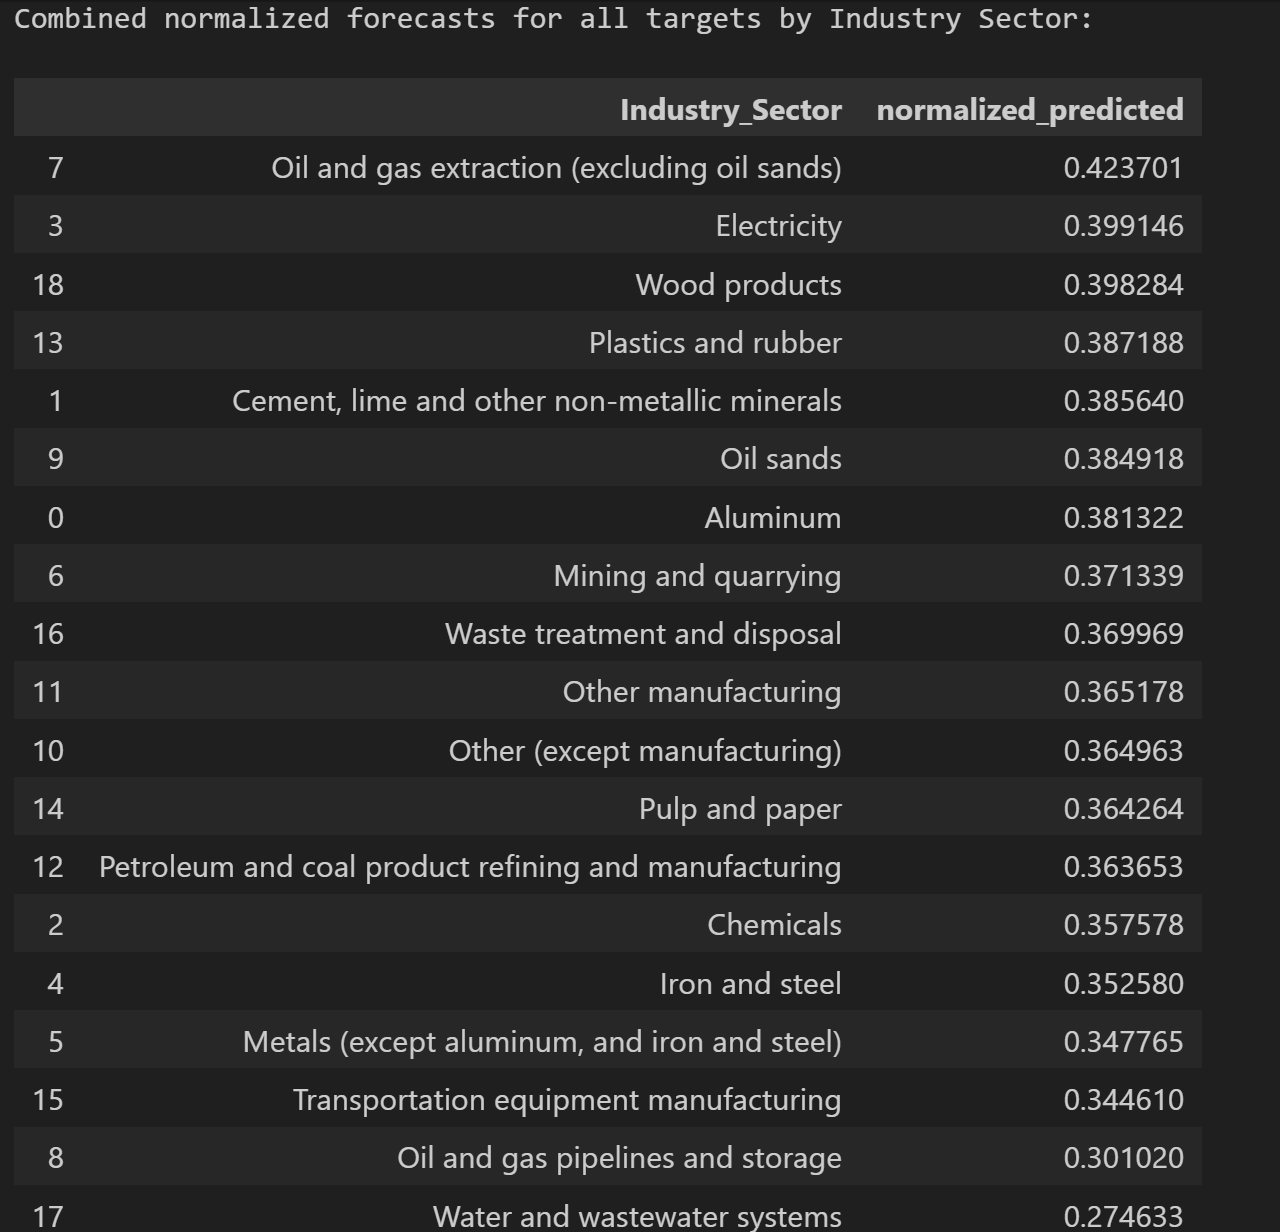

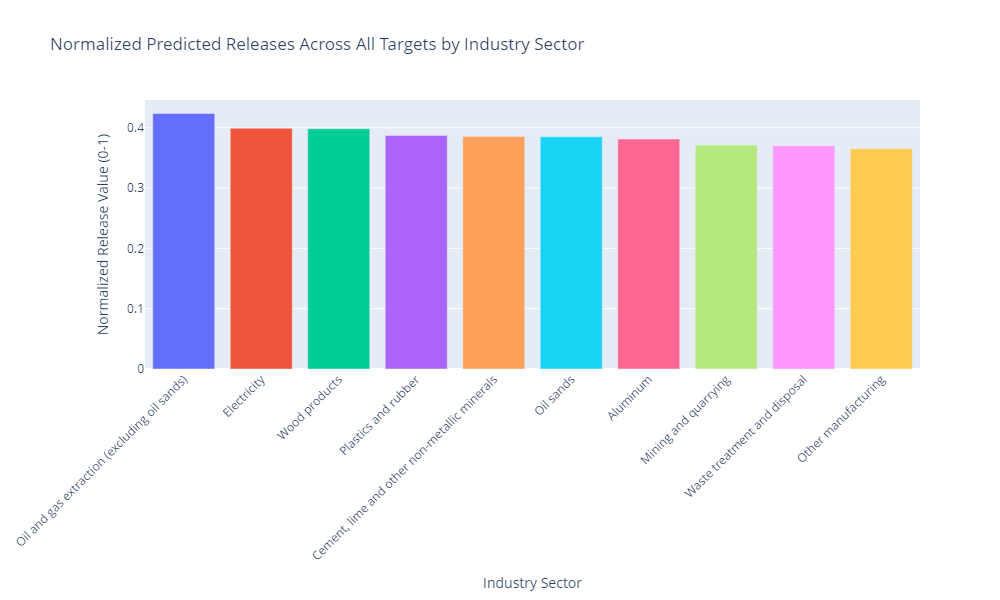

There are more images but to save memory and efficiency purposes, we won't display them all.

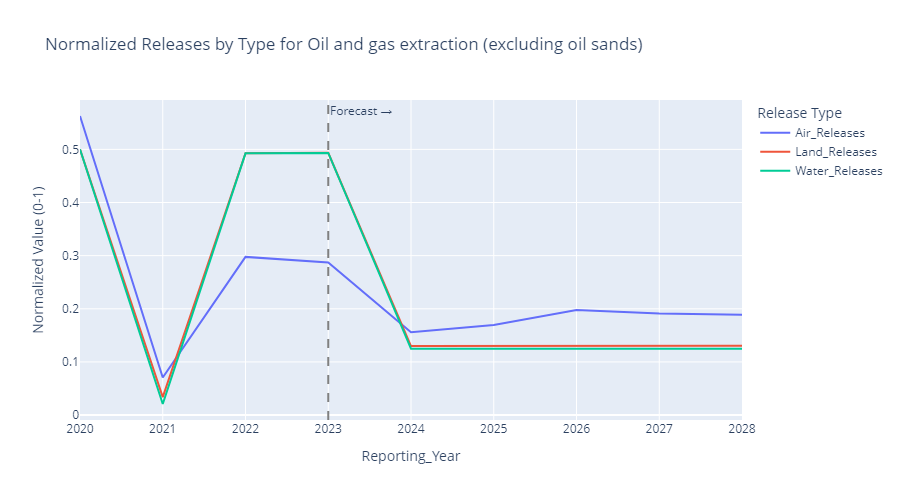

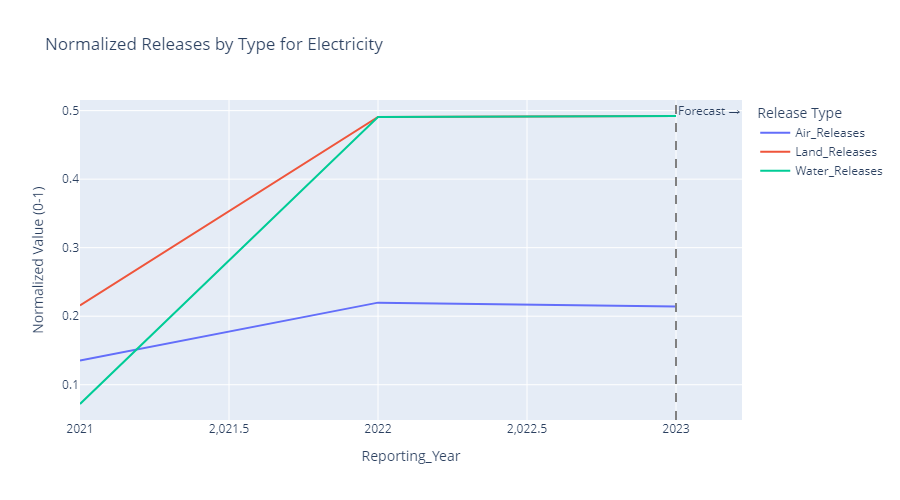

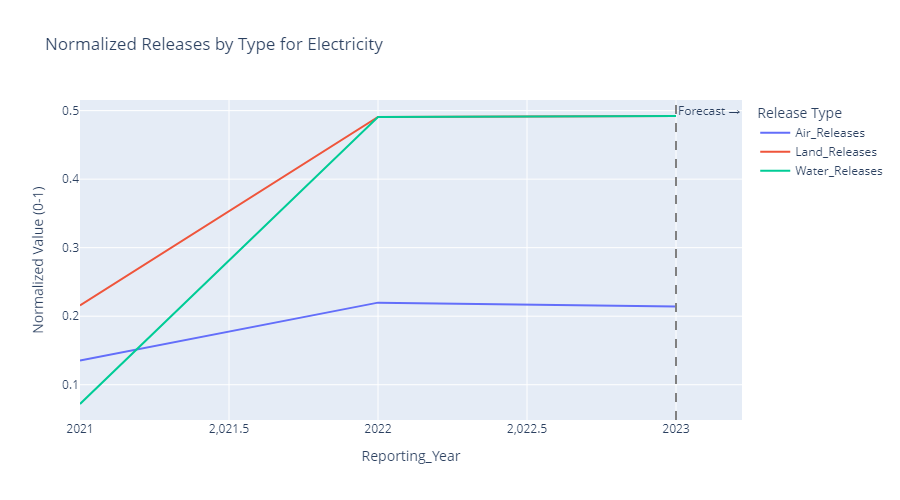

In [ ]:
print("\nProjected Growth in Releases from 2023 to 2028 by Industry Sector:")


# Define the reference and forecast years
reference_year = 2023  # Last known year
forecast_years = list(range(2024, 2029))  # 2024 to 2028


# Calculate growth for each industry sector
growth_by_industry = []


for target in list_of_targets:
    # Get the aggregated data with filled values
    pivot_df = industry_aggregates[target]['pivot_format']

    # For each industry, calculate the total growth
    for industry in pivot_df.index:
        # Get reference value (2023)
        if reference_year in pivot_df.columns:
            reference_value = pivot_df.loc[industry, reference_year]
            # Calculate total growth across forecast years
            growth = 0
            for year in forecast_years:
                if year in pivot_df.columns:
                    # Add the difference between this year and the reference
                    forecast_value = pivot_df.loc[industry, year]
                    year_growth = forecast_value - reference_value
                    growth += year_growth
            # Store the growth data
            growth_by_industry.append({
                'Industry_Sector': industry,
                'Target': target_labels[target],
                'Reference_Value': reference_value,
                'Total_Growth': growth
            })


# Convert to DataFrame
growth_df = pd.DataFrame(growth_by_industry)


# Calculate total growth across all targets
total_growth_by_industry = growth_df.groupby('Industry_Sector')['Total_Growth'].sum().reset_index()
total_growth_by_industry = total_growth_by_industry.sort_values('Total_Growth', ascending=False)


# Display the results
display(total_growth_by_industry)


# Create bar chart for total growth
fig = px.bar(
    total_growth_by_industry.head(10),
    x='Industry_Sector',
    y='Total_Growth',
    title='Projected Total Growth in Normalized Releases (2023-2028) by Industry Sector',
    labels={'Total_Growth': 'Total Growth in Normalized Values', 'Industry_Sector': 'Industry Sector'},
    width=1000,
    height=600,
    color='Total_Growth',
    color_continuous_scale='RdYlGn_r'  # Red for high growth (worse), green for low/negative growth (better)
)


fig.update_layout(
    xaxis=dict(tickangle=-45),
    font=dict(size=12),
    coloraxis_colorbar=dict(title='Total<br>Growth'),
    hovermode="x"
)


fig.show()



Output:

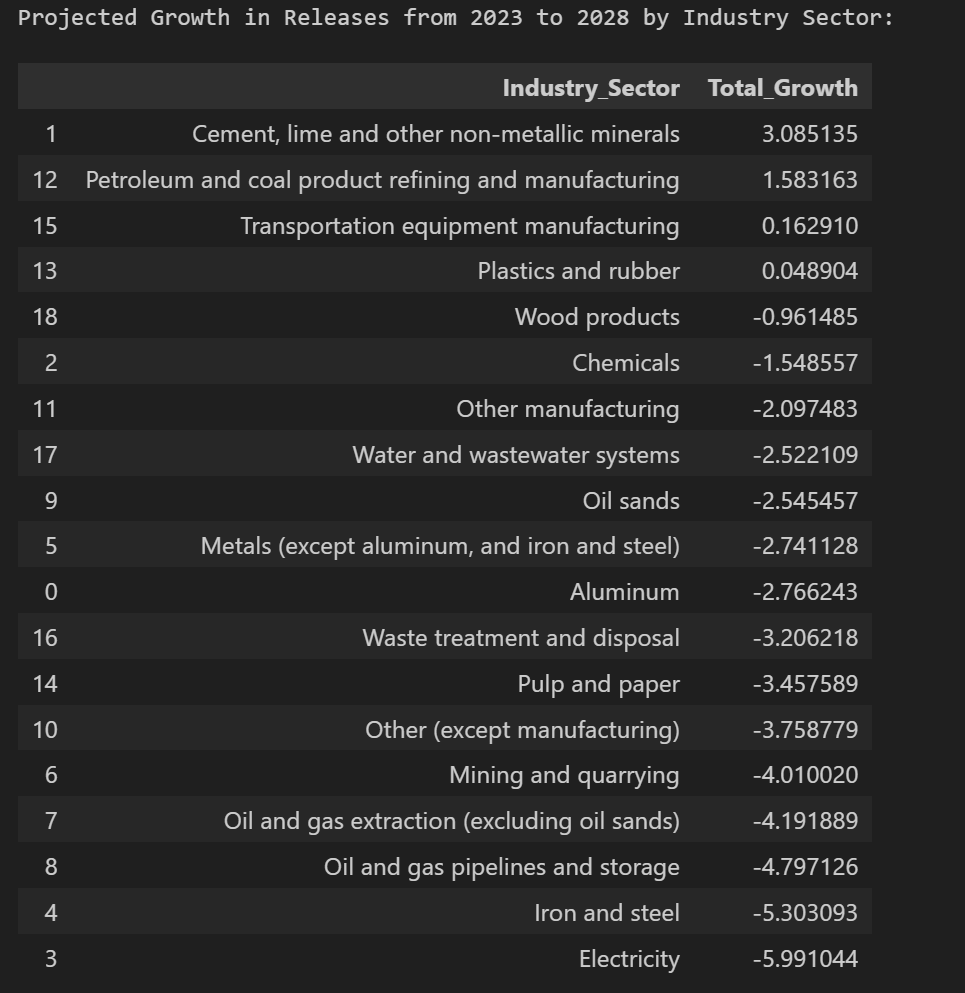

Output:

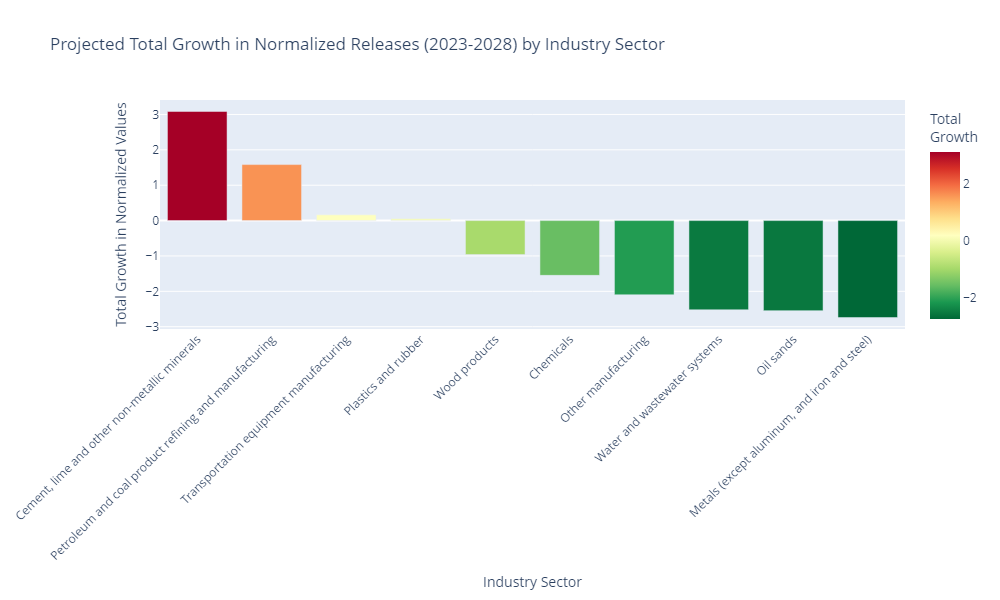

## 📊 Projected Growth in Normalized Releases (2023–2028) by Industry and Release Type

This bar chart illustrates the **net change in normalized pollutant releases** from 2023 to 2028, segmented by **industry sector** and **release type** (Air, Land, Water). The goal is to highlight **directional trends**—which industries are projected to increase or reduce their environmental impact over time.

---

### ✅ Why This Visualization Matters

- **Change Detection**: Rather than showing total emissions, this chart emphasizes the **change** between 2023 and 2028 to help detect **emerging risks** or **positive shifts**.
- **Targeted Insights**: Segmenting by release type helps identify **where** the impact is occurring—air, land, or water.
- **Normalized Values for Fair Comparison**: Scaling all values from 0 to 1 allows us to **compare trends across pollutants and release types**, regardless of their raw quantities.
- **Supports Decision-Making**: Sectors showing consistent growth may need **policy attention or innovation investment**, while others can serve as examples of **environmental progress**.

---

### 🧠 Methodology

1. **Industry Selection**  
   We selected the top 6 industry sectors based on **total projected change** (growth or reduction) across all release types from 2023 to 2028.

2. **Growth Formula**  
   \[
   \text{Growth} = \text{Normalized 2028 value} - \text{Normalized 2023 value}
   \]  
   This approach captures the **relative direction and magnitude** of change.

3. **Chart Interpretation**  
   Each group of bars corresponds to an industry sector:
   - **Blue (Air)**, **Red (Land)**, and **Green (Water)** bars represent the projected change.
   - Positive bars mean **increased pollution**; negative bars suggest **reduction** or improvement.

---

### 🧾 Key Insights from the Chart

- **Cement, lime, and other non-metallic minerals** show the **highest projected increase** in **air releases**, making it a key industry to monitor.
- **Petroleum and Coal Product Refining** stands out with a sharp **rise in land releases**, highlighting potential environmental risks.
- **Transportation Equipment Manufacturing** demonstrates a **notable decrease in water releases**, suggesting improvement or cleaner practices.
- **Plastics and Rubber** show mixed but generally **small changes**, with a slight decline in water releases.
- **Chemicals** and **Wood Products** exhibit **modest reductions** or stable patterns across all pathways.

---

This chart provides a **final, comparative snapshot** of forecasted environmental changes across industries—guiding regulatory focus, sustainability planning, and future innovation efforts.


In [ ]:
#show growth by release type for top industries
top_industries = total_growth_by_industry.head(6)['Industry_Sector'].tolist()
growth_by_type = growth_df[growth_df['Industry_Sector'].isin(top_industries)]

fig = px.bar(
    growth_by_type,
    x='Industry_Sector',
    y='Total_Growth',
    color='Target',
    title='Projected Growth in Normalized Releases (2023-2028) by Industry Sector and Release Type',
    labels={'Total_Growth': 'Growth in Normalized Values', 'Industry_Sector': 'Industry Sector', 'Target': 'Release Type'},
    width=1000,
    height=600,
    barmode='group'
)

fig.update_layout(
    xaxis=dict(tickangle=-45),
    font=dict(size=12),
    legend_title="Release Type",
    hovermode="x unified"
)

fig.show()

Output:

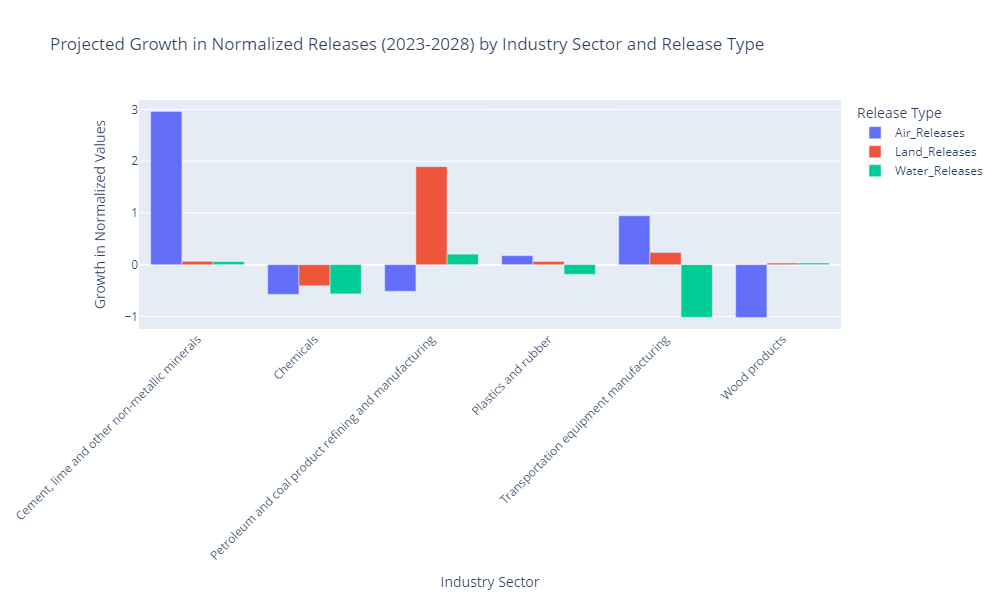

## ✅ Problem Solved: Industry Emissions Forecast (2023–2028)

### 🎯 Problem Statement
**Based on NPRI data, which industry is predicted to have the highest growth of releases in 5 years? Which will have the largest decline?**

---

### ✅ Summary of Results

Using time-series modeling and autoregressive forecasting across **Air_Releases**, **Land_Releases**, and **Water_Releases**, the normalized trends from **2023 to 2028** reveal substantial differences in projected emission behaviors between sectors.

---

### 🔺 Industry with the Highest Projected Growth  
**➡ Cement, Lime, and Other Non-Metallic Minerals**

- This industry is forecasted to have the **greatest increase** in total normalized emissions over the 5-year period.
- Growth is driven primarily by **air releases**, with smaller but positive contributions from land and water releases.
- Represents a potential area of concern for **air quality and emissions regulation**.

---

### 🔻 Industry with the Largest Projected Decline  
**➡ Metals (Except Aluminum, and Iron and Steel)**

- This sector shows the **largest overall reduction** in normalized emissions from 2023 to 2028.
- The decline spans **all release types**, especially notable in land and water targets.
- May reflect successful implementation of **emissions mitigation technologies** or **decreased industrial activity**.

---

### 📊 Interpretation

These insights provide valuable foresight for:

- 🛡️ **Policymakers** to focus on high-growth sectors for regulatory attention and emissions oversight.  
- 🏭 **Industry leaders** to benchmark performance and invest in cleaner technologies.  
- 🌱 **Sustainability planning** by identifying which industries are improving and which are becoming higher-risk.

---

### 📌 Notes

- Forecasts are based on autoregressive predictions using the best-performing model for each substance and release target.  
- Normalization was applied across targets to enable **fair comparison** between industries of different scales.  
- The results reflect **total net change** in predicted releases from 2023 to 2028.
